<a href="https://colab.research.google.com/github/OsherElhadad/tabular_data_science_biu_2023_final_project/blob/main/TDS_MS_and_OE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Our project aims to enhance the data science pipeline by addressing the common issue of incorrectly missing identification of numeric fields that should be treated as nominal due to their lack of inherent order. Failure to correctly identify these fields can lead to erroneous inferences and false correlations, which can severely impact the process of conclusion making in the data science pipeline.

This notebook implements a few methods for automating the process of identifying numeric fields in datasets that should be trated as nominal. <br>
This process can be done maually (as showed in class) and we aim to examine a few AI techniques to make the automate the process.
Among the techniques examined you will find some supervised and unsupervised learning models.

# Imports, Load and Preprocess Data

## Import essential libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.stats import ks_1samp as ks, uniform, norm, chisquare, skew, kurtosis
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

## Load Train + Validation Datasets
This code reads several datasets from the UCI Machine Learning Repository and renames their columns using the rename_columns function.

The function rename_columns takes two arguments: a pandas DataFrame df and a list of new column names column_names. The function sets the column names of df to the names in column_names and returns the resulting DataFrame.

The datasets being read are:

#####"housing": housing values in suburbs of Boston.
#####"wine": results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.
#####"breast_cancer": breast cancer data, including diagnosis and various measurements of the tumor.
#####"titanic": passenger information on the Titanic, including survival status.
#####"adult": census data, including age, education, occupation, and income.
#####"mushroom": mushroom classification data, including various features of the mushrooms.
#####"car": car evaluation data, including buying price, maintenance price, and number of doors and persons the car can accommodate.
#####"iris": iris plant classification data, including measurements of the sepal and petal lengths and widths.

In [2]:
def rename_columns(df, column_names):
    df.columns = column_names
    return df

In [3]:
housing_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
housing = rename_columns(housing, housing_cols)
print('housing')
print(housing)

housing
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [4]:
wine_cols = ['Wine', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine = rename_columns(wine, wine_cols)
print('wine')
print(wine)

wine
     Wine  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
..    ...      ...         ...   ...                ...        ...   
173     3    13.71        5.65  2.45               20.5         95   
174     3    13.40        3.91  2.48               23.0        102   
175     3    13.27        4.28  2.26               20.0        120   
176     3    13.17        2.59  2.37               20.0        120   
177     3    14.13        4.10  2.74               24.5         96   

     Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1       

In [5]:
breast_cancer_cols = ['ID', 'Diagnosis', 'Radius Mean', 'Texture Mean', 'Perimeter Mean', 'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean', 'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean', 'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE', 'Radius Worst', 'Texture Worst', 'Perimeter Worst', 'Area Worst', 'Smoothness Worst', 'Compactness Worst', 'Concavity Worst', 'Concave Points Worst', 'Symmetry Worst', 'Fractal Dimension Worst']
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
breast_cancer = rename_columns(breast_cancer, breast_cancer_cols)
print('breast_cancer')
print(breast_cancer)

breast_cancer
           ID Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     Smoothne

In [6]:
iris_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=iris_cols)
print('iris')
print(iris)

iris
     sepal_length  sepal_width  petal_length  petal_width      iris_class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [7]:
titanic_cols = ['Survived', 'Pclass', 'Name', 'Sex', 'SAge', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
titanic = rename_columns(titanic, titanic_cols)
print('titanic')
print(titanic)

titanic
     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex  SAge  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  


In [8]:
adult_cols = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'ASex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income']
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
adult = rename_columns(adult, adult_cols)
print('adult')
print(adult)

adult
       Age          Workclass  fnlwgt    Education  Education-Num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-c

In [9]:
car_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_class']
car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=car_cols)
print('car')
print(car)

car
     buying  maint  doors persons lug_boot safety car_class
0     vhigh  vhigh      2       2    small    low     unacc
1     vhigh  vhigh      2       2    small    med     unacc
2     vhigh  vhigh      2       2    small   high     unacc
3     vhigh  vhigh      2       2      med    low     unacc
4     vhigh  vhigh      2       2      med    med     unacc
...     ...    ...    ...     ...      ...    ...       ...
1723    low    low  5more    more      med    med      good
1724    low    low  5more    more      med   high     vgood
1725    low    low  5more    more      big    low     unacc
1726    low    low  5more    more      big    med      good
1727    low    low  5more    more      big   high     vgood

[1728 rows x 7 columns]


In [10]:
mushroom_cols = ['mushroom_class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing',
                 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type',
                 'spore_print_color', 'population', 'habitat']
mushroom = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                             names=mushroom_cols)
print('mushroom')
print(mushroom)

mushroom
     mushroom_class cap_shape cap_surface cap_color bruises odor  \
0                 p         x           s         n       t    p   
1                 e         x           s         y       t    a   
2                 e         b           s         w       t    l   
3                 p         x           y         w       t    p   
4                 e         x           s         g       f    n   
...             ...       ...         ...       ...     ...  ...   
8119              e         k           s         n       f    n   
8120              e         x           s         n       f    n   
8121              e         f           s         n       f    n   
8122              p         k           y         n       f    y   
8123              e         x           s         n       f    n   

     gill_attachment gill_spacing gill_size gill_color  ...  \
0                  f            c         n          k  ...   
1                  f            c         b     

Concatenate all the datasets into one big dataframe- for the deep learning model and the unsupervised model.

In [ ]:
concat_df = pd.concat([housing, breast_cancer, adult, car, mushroom], axis=1, join='inner')
concat_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,0,0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,0,0,0,0,0,0,0,1,1,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,0,0,0,0,0,0,0,1,1,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,0,0,0,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,...,0,0,0,0,0,0,0,0,1,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,...,0,0,0,0,0,0,0,0,1,2
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,...,0,0,0,0,0,0,0,0,0,2
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,...,0,0,0,0,0,0,0,1,0,1


We select all columns in a pandas DataFrame df that have dtype object (textual), and then apply the factorize function to encode the values in those columns as integers. The encoded values are then assigned back to the same columns in df.

In [ ]:
concat_df[concat_df.select_dtypes(['object']).columns] = concat_df.select_dtypes(['object']).apply(lambda x: pd.factorize(x)[0])
concat_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,0,0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,0,0,0,0,0,0,0,1,1,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,0,0,0,0,0,0,0,1,1,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,0,0,0,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,...,0,0,0,0,0,0,0,0,1,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,...,0,0,0,0,0,0,0,0,1,2
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,...,0,0,0,0,0,0,0,0,0,2
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,...,0,0,0,0,0,0,0,1,0,1


In [11]:
df_list = {'housing':housing, 'wine':wine, 'breast_cancer':breast_cancer,
           'iris':iris, 'titanic':titanic, 'adult':adult, 'car':car,
           'mushroom':mushroom}

We loop over a list of DataFrames called df_list and for each DataFrame in the list, it loops over all its columns.

For each column, it calculates the count of each unique value in that column using value_counts() method of pandas Series (as shown in class), and then prints the number of unique values and the maximum frequency of the most common value in the column- To help us in understanding the data and labelling manually the nominal and not nominal fields, as shown in class.

There are 504 unique values
Max repeated value with 2 repetitions


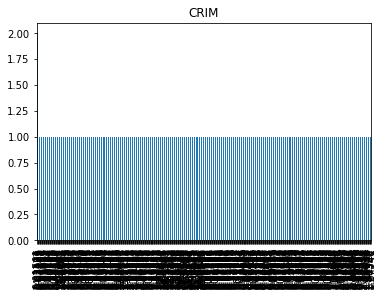

There are 26 unique values
Max repeated value with 372 repetitions


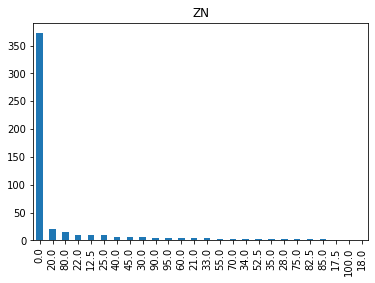

There are 76 unique values
Max repeated value with 132 repetitions


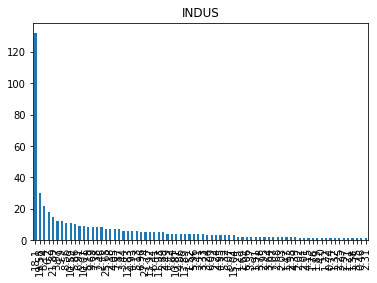

There are 2 unique values
Max repeated value with 471 repetitions


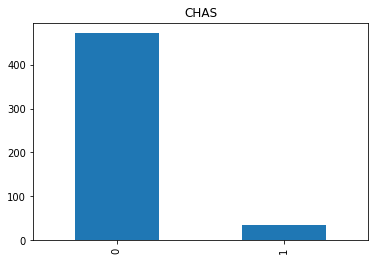

There are 81 unique values
Max repeated value with 23 repetitions


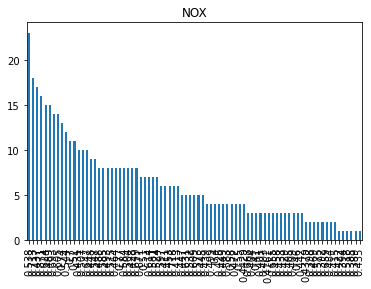

There are 446 unique values
Max repeated value with 3 repetitions


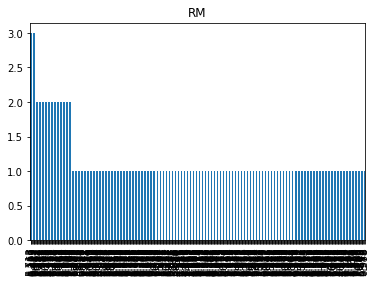

There are 356 unique values
Max repeated value with 43 repetitions


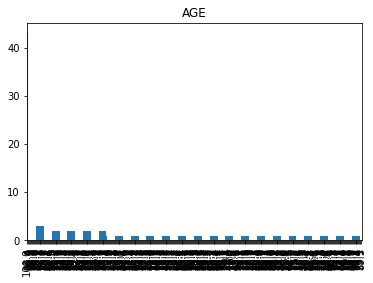

There are 412 unique values
Max repeated value with 5 repetitions


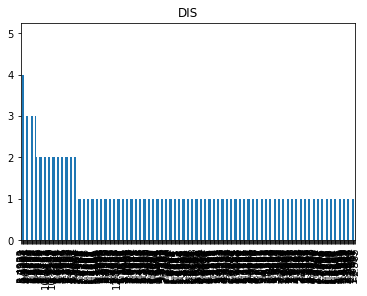

There are 9 unique values
Max repeated value with 132 repetitions


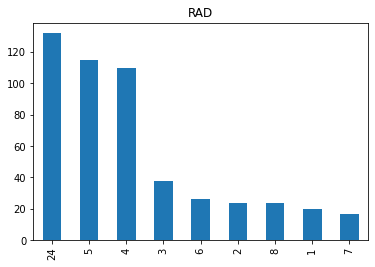

There are 66 unique values
Max repeated value with 132 repetitions


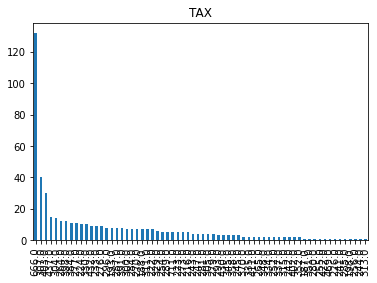

There are 46 unique values
Max repeated value with 140 repetitions


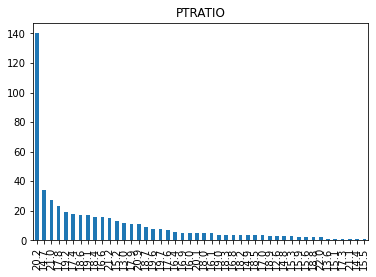

There are 357 unique values
Max repeated value with 121 repetitions


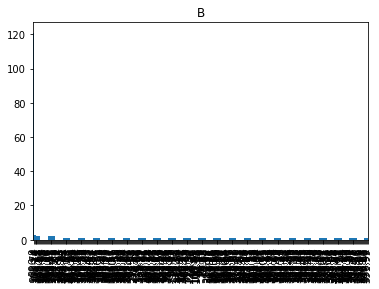

There are 455 unique values
Max repeated value with 3 repetitions


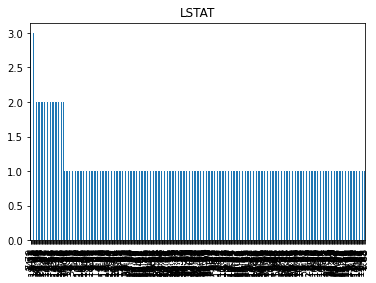

There are 229 unique values
Max repeated value with 16 repetitions


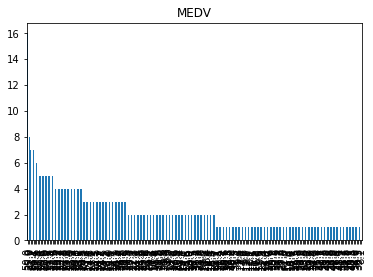

There are 3 unique values
Max repeated value with 71 repetitions


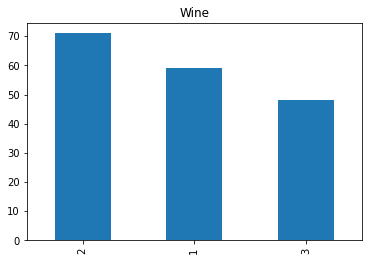

There are 126 unique values
Max repeated value with 6 repetitions


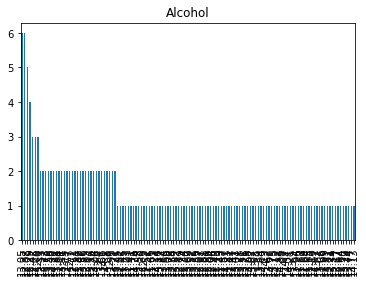

There are 133 unique values
Max repeated value with 7 repetitions


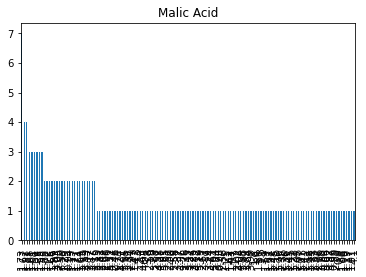

There are 79 unique values
Max repeated value with 7 repetitions


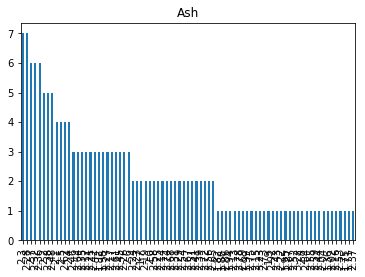

There are 63 unique values
Max repeated value with 15 repetitions


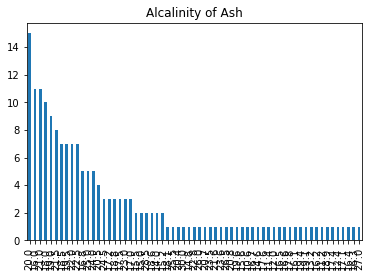

There are 53 unique values
Max repeated value with 13 repetitions


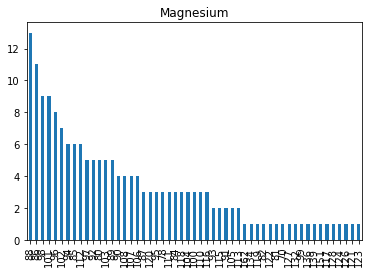

There are 97 unique values
Max repeated value with 8 repetitions


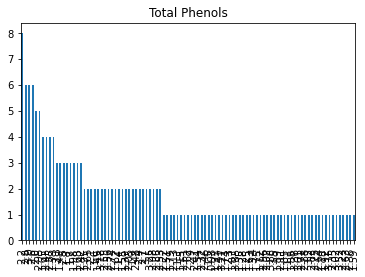

There are 132 unique values
Max repeated value with 4 repetitions


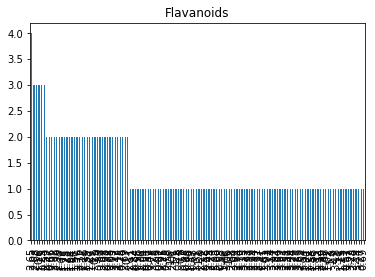

There are 39 unique values
Max repeated value with 11 repetitions


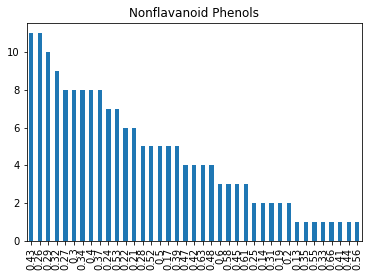

There are 101 unique values
Max repeated value with 9 repetitions


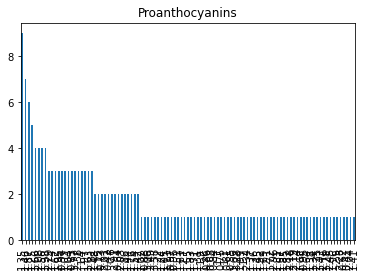

There are 132 unique values
Max repeated value with 4 repetitions


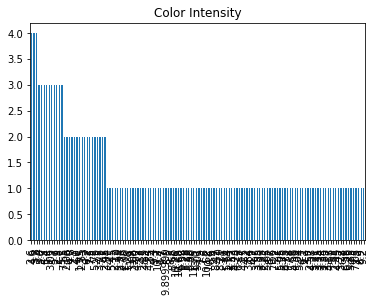

There are 78 unique values
Max repeated value with 8 repetitions


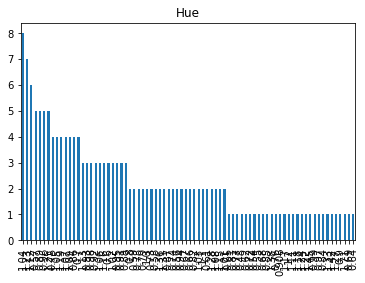

There are 122 unique values
Max repeated value with 5 repetitions


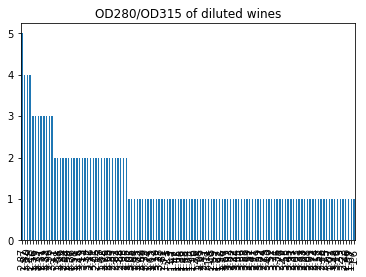

There are 121 unique values
Max repeated value with 5 repetitions


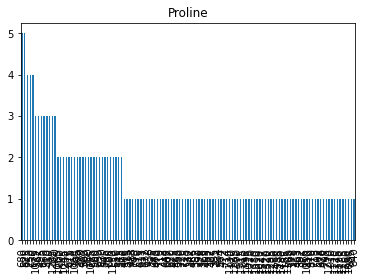

There are 569 unique values
Max repeated value with 1 repetitions


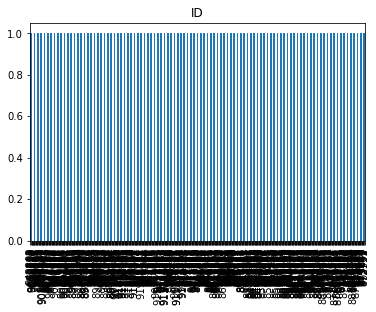

There are 2 unique values
Max repeated value with 357 repetitions


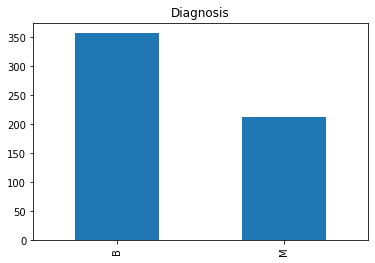

There are 456 unique values
Max repeated value with 4 repetitions


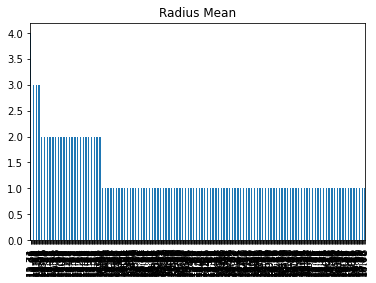

There are 479 unique values
Max repeated value with 3 repetitions


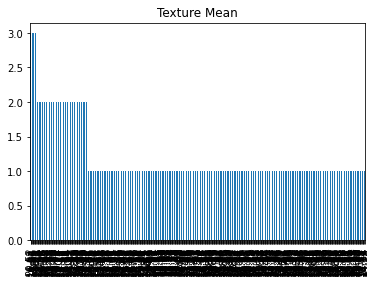

There are 522 unique values
Max repeated value with 3 repetitions


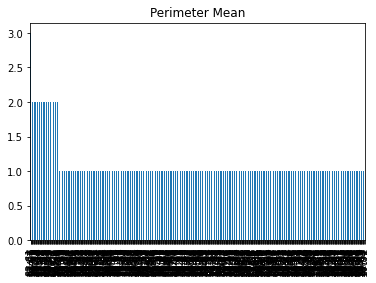

There are 539 unique values
Max repeated value with 3 repetitions


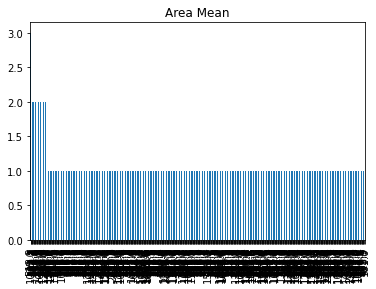

There are 474 unique values
Max repeated value with 5 repetitions


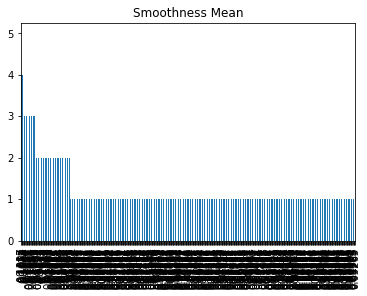

There are 537 unique values
Max repeated value with 3 repetitions


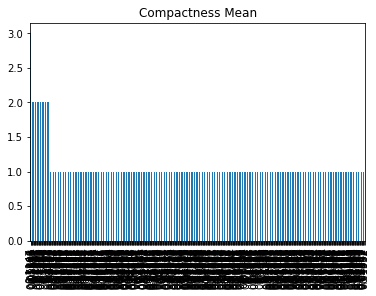

There are 537 unique values
Max repeated value with 13 repetitions


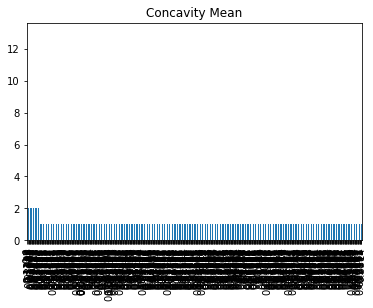

There are 542 unique values
Max repeated value with 13 repetitions


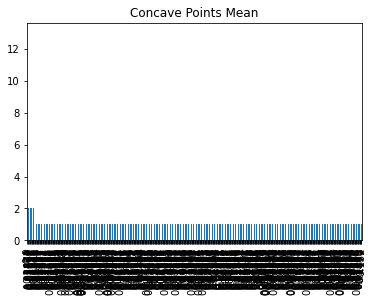

There are 432 unique values
Max repeated value with 4 repetitions


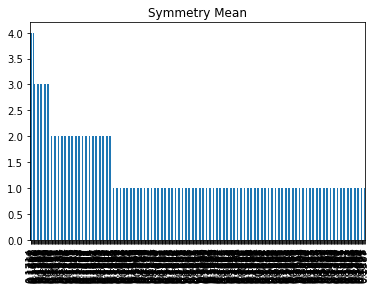

There are 499 unique values
Max repeated value with 3 repetitions


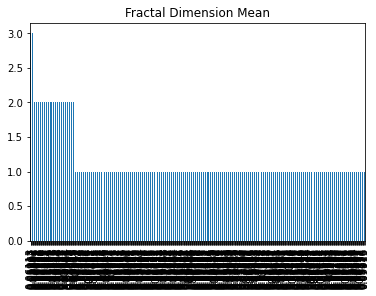

There are 540 unique values
Max repeated value with 3 repetitions


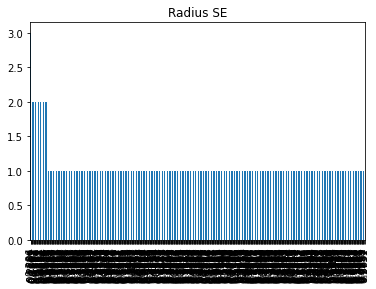

There are 519 unique values
Max repeated value with 3 repetitions


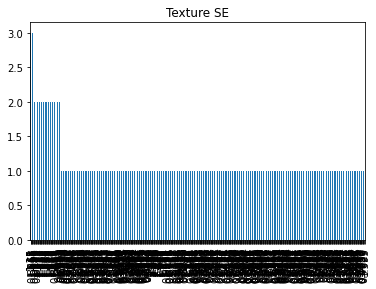

There are 533 unique values
Max repeated value with 4 repetitions


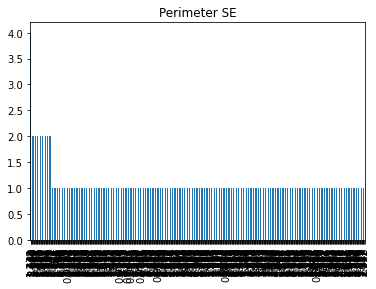

There are 528 unique values
Max repeated value with 3 repetitions


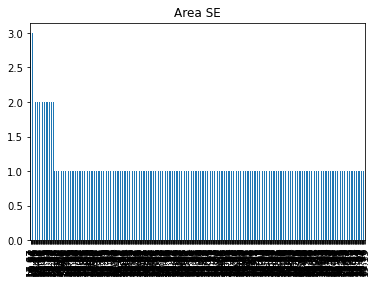

There are 547 unique values
Max repeated value with 2 repetitions


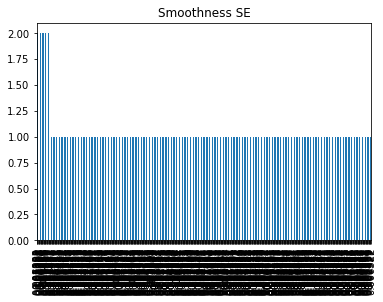

There are 541 unique values
Max repeated value with 3 repetitions


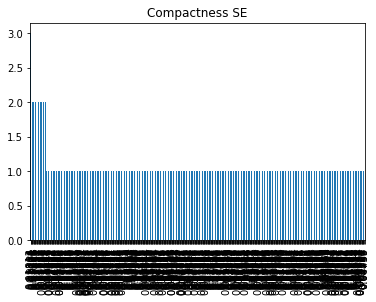

There are 533 unique values
Max repeated value with 13 repetitions


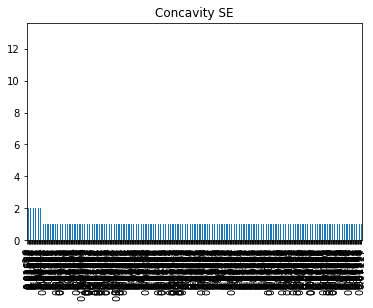

There are 507 unique values
Max repeated value with 13 repetitions


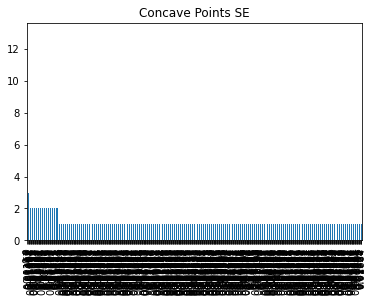

There are 498 unique values
Max repeated value with 4 repetitions


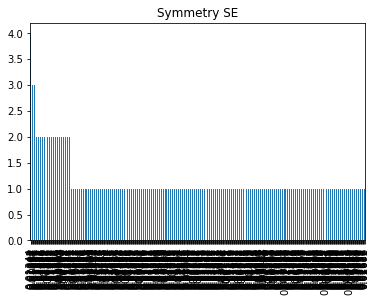

There are 545 unique values
Max repeated value with 2 repetitions


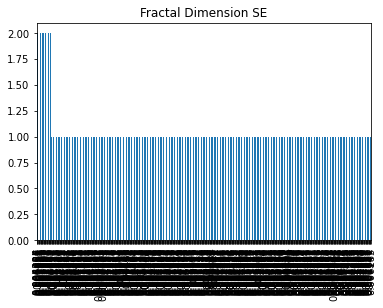

There are 457 unique values
Max repeated value with 5 repetitions


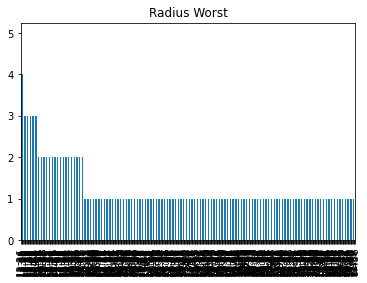

There are 511 unique values
Max repeated value with 3 repetitions


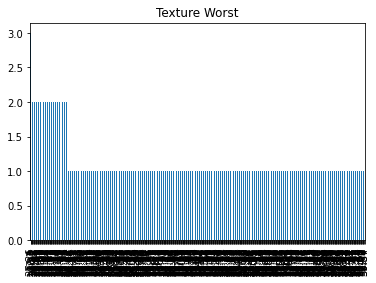

There are 514 unique values
Max repeated value with 3 repetitions


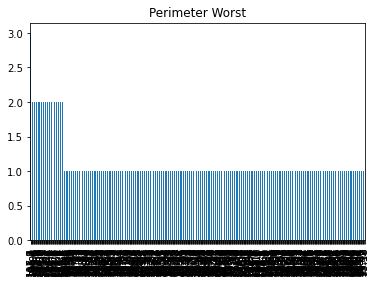

There are 544 unique values
Max repeated value with 2 repetitions


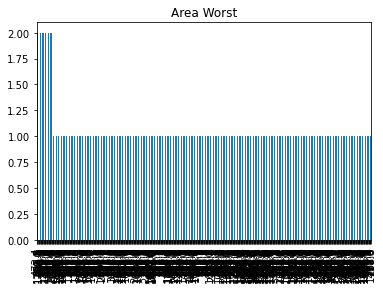

There are 411 unique values
Max repeated value with 4 repetitions


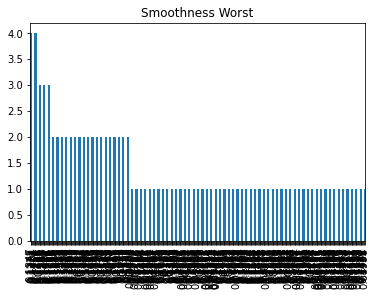

There are 529 unique values
Max repeated value with 3 repetitions


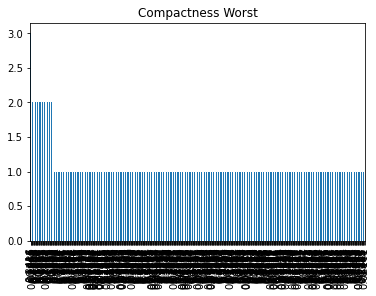

There are 539 unique values
Max repeated value with 13 repetitions


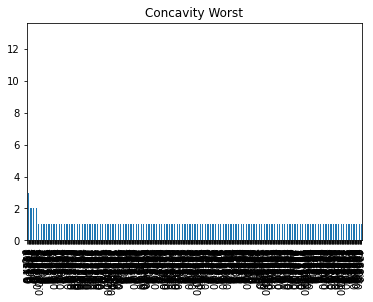

There are 492 unique values
Max repeated value with 13 repetitions


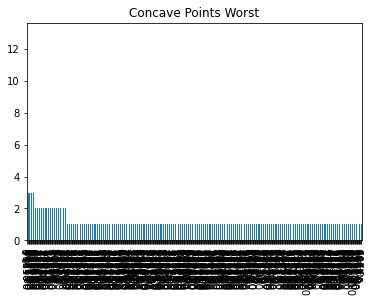

There are 500 unique values
Max repeated value with 3 repetitions


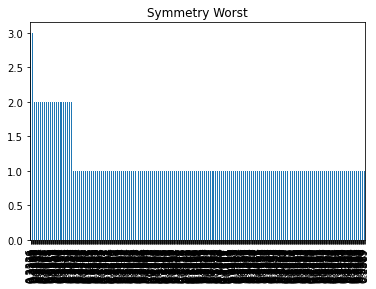

There are 535 unique values
Max repeated value with 3 repetitions


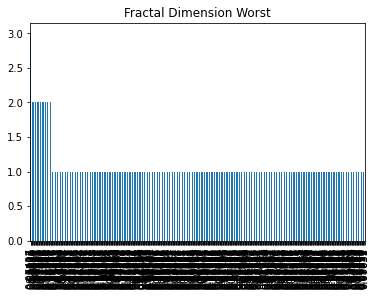

There are 35 unique values
Max repeated value with 10 repetitions


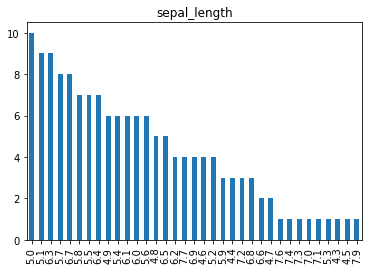

There are 23 unique values
Max repeated value with 26 repetitions


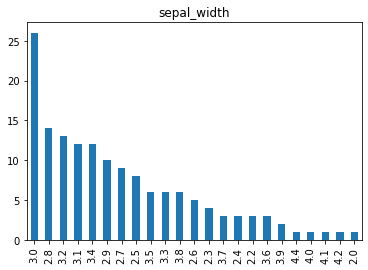

There are 43 unique values
Max repeated value with 14 repetitions


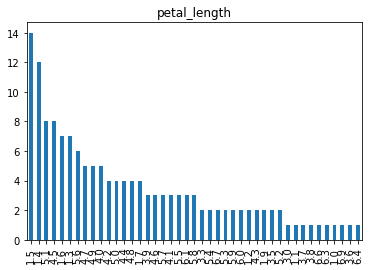

There are 22 unique values
Max repeated value with 28 repetitions


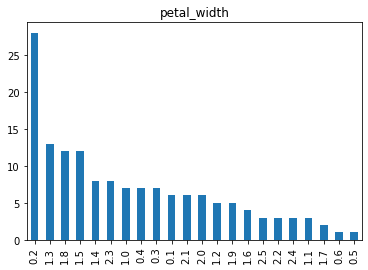

There are 3 unique values
Max repeated value with 50 repetitions


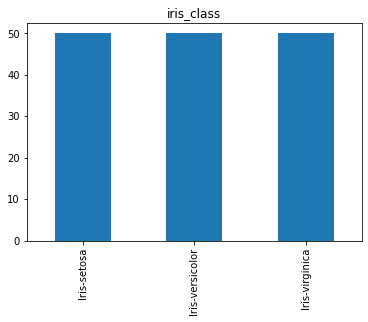

There are 2 unique values
Max repeated value with 545 repetitions


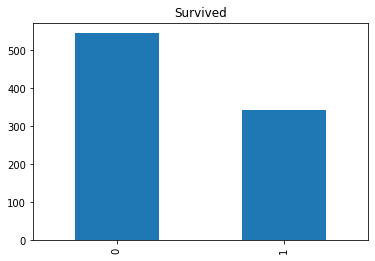

There are 3 unique values
Max repeated value with 487 repetitions


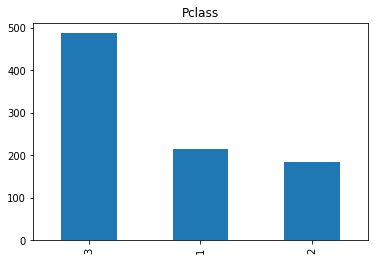

There are 887 unique values
Max repeated value with 1 repetitions


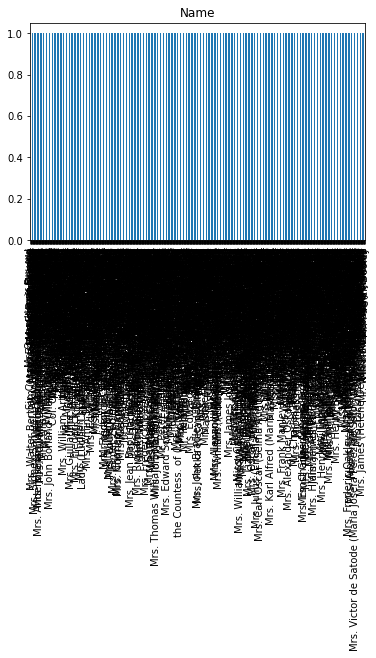

There are 2 unique values
Max repeated value with 573 repetitions


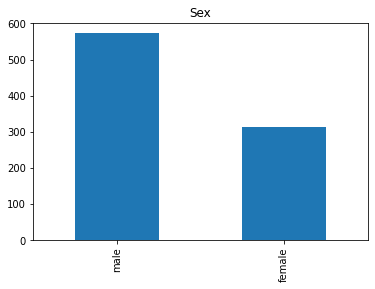

There are 89 unique values
Max repeated value with 39 repetitions


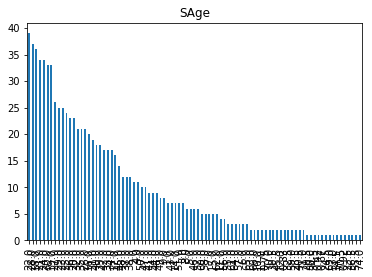

There are 7 unique values
Max repeated value with 604 repetitions


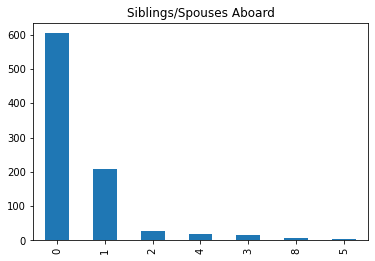

There are 7 unique values
Max repeated value with 674 repetitions


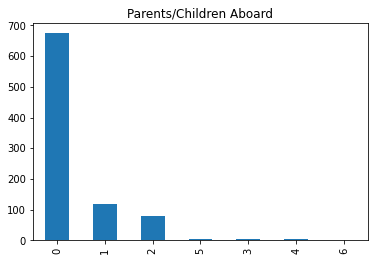

There are 248 unique values
Max repeated value with 43 repetitions


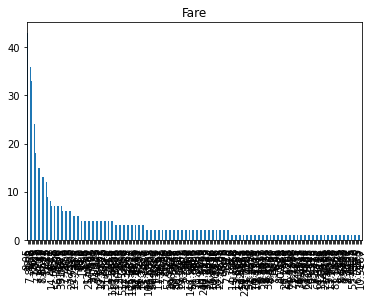

There are 73 unique values
Max repeated value with 898 repetitions


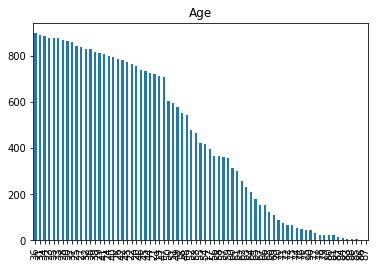

There are 9 unique values
Max repeated value with 22696 repetitions


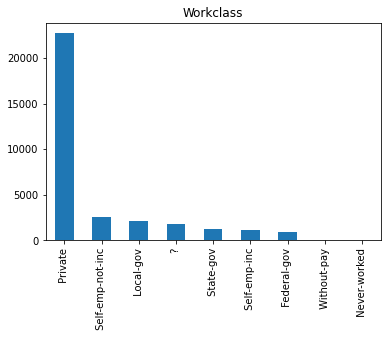

There are 21648 unique values
Max repeated value with 13 repetitions


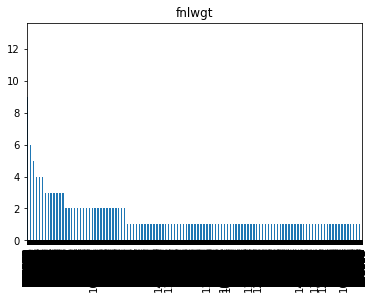

There are 16 unique values
Max repeated value with 10501 repetitions


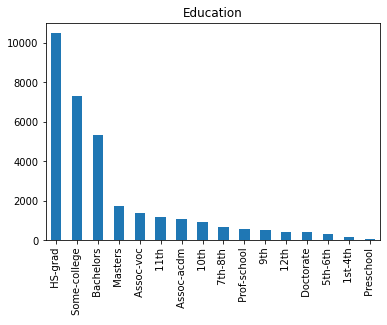

There are 16 unique values
Max repeated value with 10501 repetitions


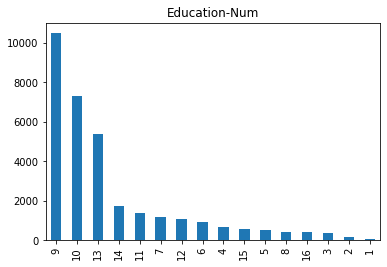

There are 7 unique values
Max repeated value with 14976 repetitions


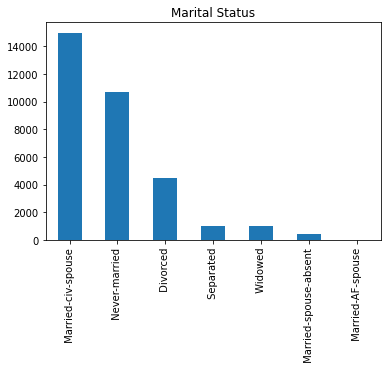

There are 15 unique values
Max repeated value with 4140 repetitions


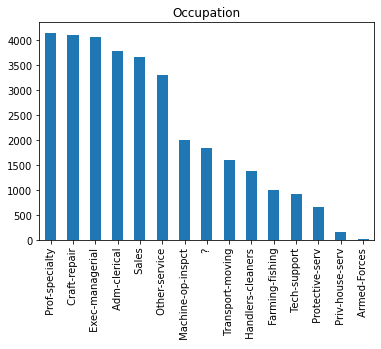

There are 6 unique values
Max repeated value with 13193 repetitions


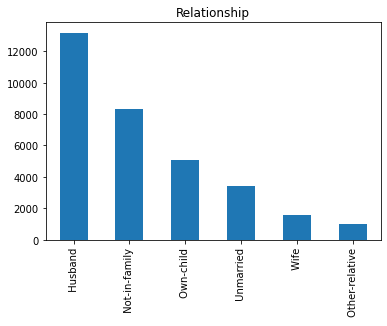

There are 5 unique values
Max repeated value with 27816 repetitions


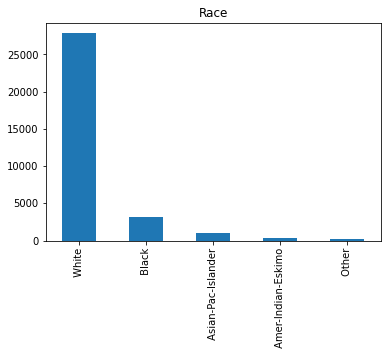

There are 2 unique values
Max repeated value with 21790 repetitions


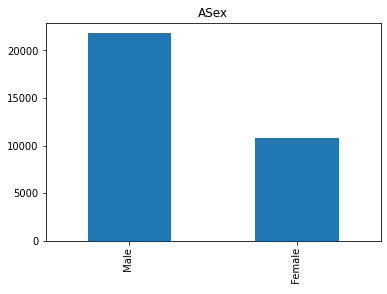

There are 119 unique values
Max repeated value with 29849 repetitions


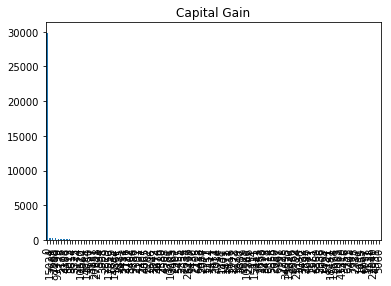

There are 92 unique values
Max repeated value with 31042 repetitions


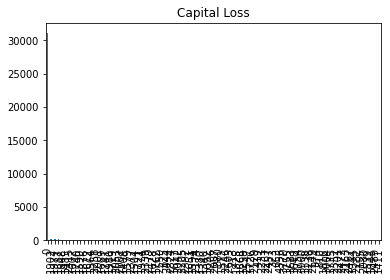

There are 94 unique values
Max repeated value with 15217 repetitions


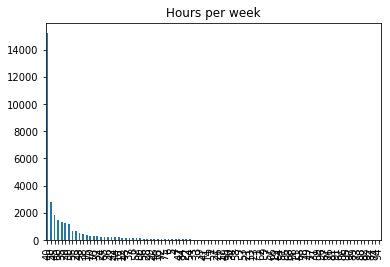

There are 42 unique values
Max repeated value with 29170 repetitions


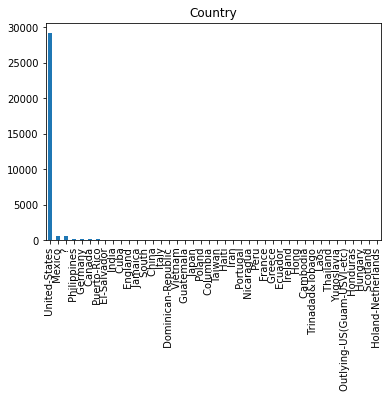

There are 2 unique values
Max repeated value with 24720 repetitions


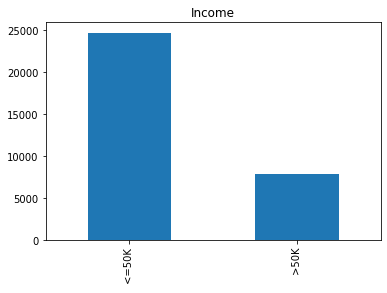

There are 4 unique values
Max repeated value with 432 repetitions


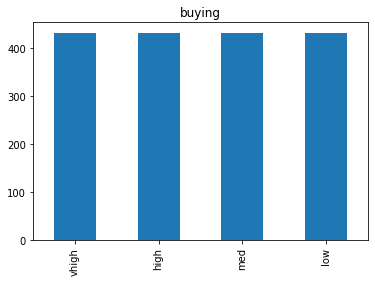

There are 4 unique values
Max repeated value with 432 repetitions


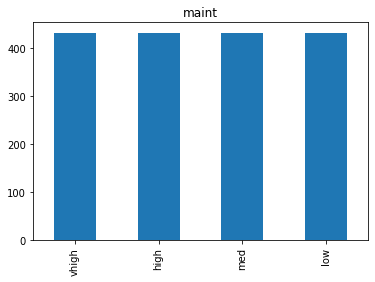

There are 4 unique values
Max repeated value with 432 repetitions


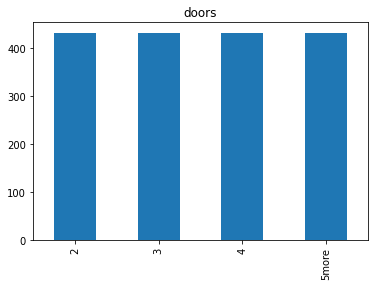

There are 3 unique values
Max repeated value with 576 repetitions


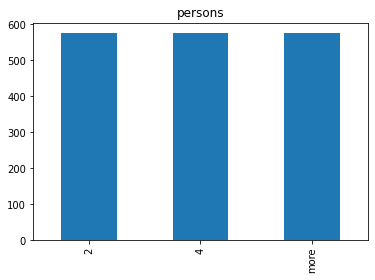

There are 3 unique values
Max repeated value with 576 repetitions


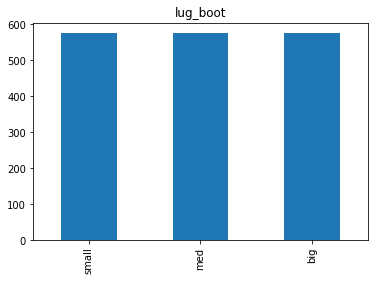

There are 3 unique values
Max repeated value with 576 repetitions


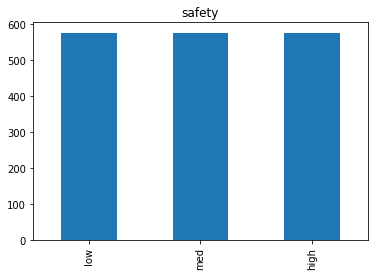

There are 4 unique values
Max repeated value with 1210 repetitions


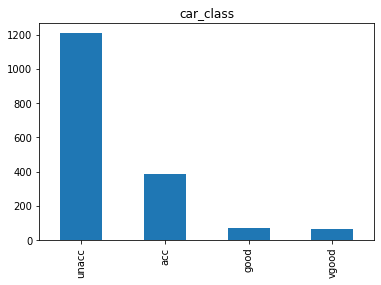

There are 2 unique values
Max repeated value with 4208 repetitions


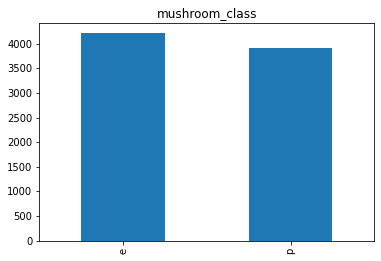

There are 6 unique values
Max repeated value with 3656 repetitions


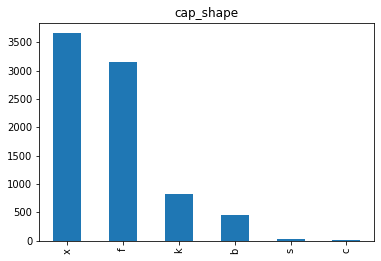

There are 4 unique values
Max repeated value with 3244 repetitions


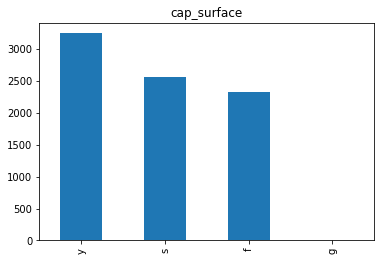

There are 10 unique values
Max repeated value with 2284 repetitions


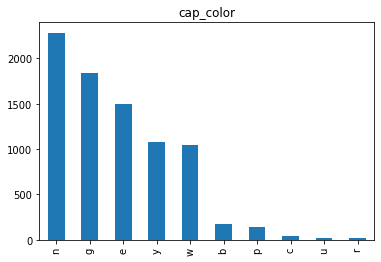

There are 2 unique values
Max repeated value with 4748 repetitions


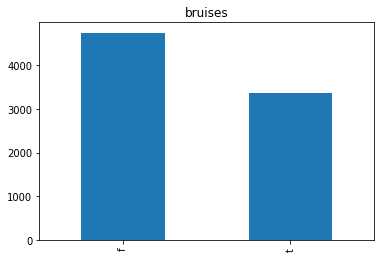

There are 9 unique values
Max repeated value with 3528 repetitions


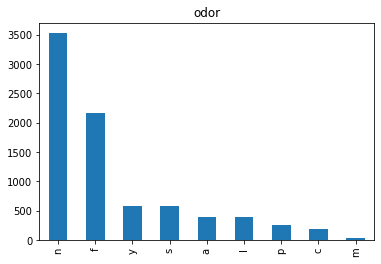

There are 2 unique values
Max repeated value with 7914 repetitions


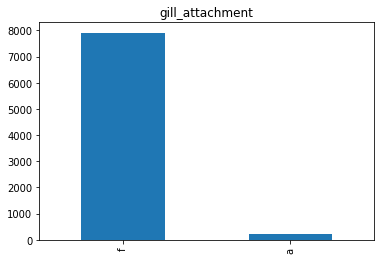

There are 2 unique values
Max repeated value with 6812 repetitions


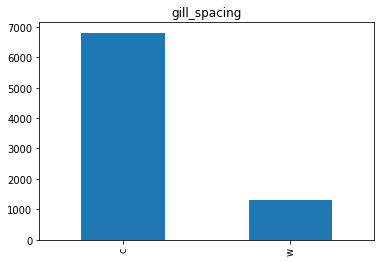

There are 2 unique values
Max repeated value with 5612 repetitions


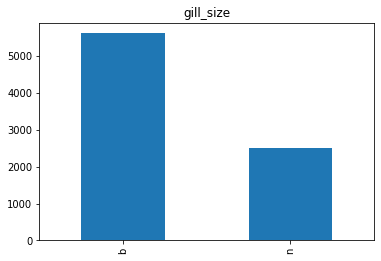

There are 12 unique values
Max repeated value with 1728 repetitions


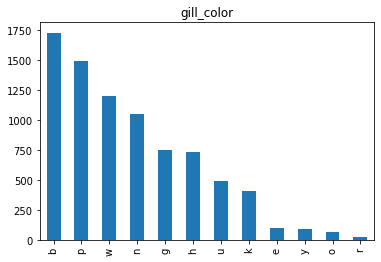

There are 2 unique values
Max repeated value with 4608 repetitions


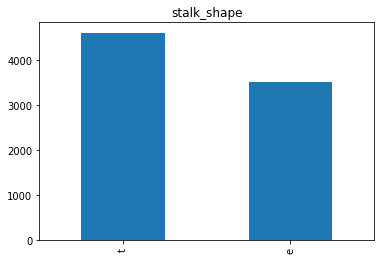

There are 5 unique values
Max repeated value with 3776 repetitions


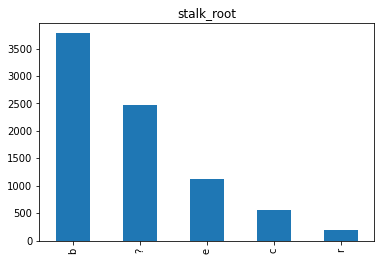

There are 4 unique values
Max repeated value with 5176 repetitions


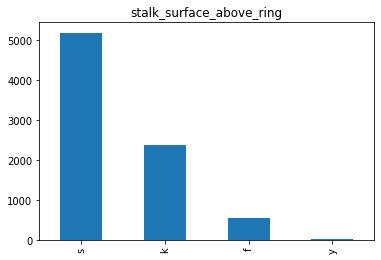

There are 4 unique values
Max repeated value with 4936 repetitions


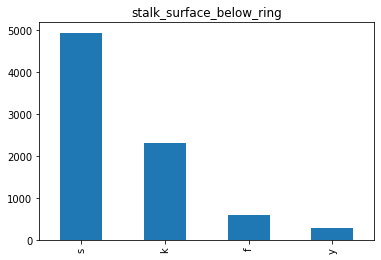

There are 9 unique values
Max repeated value with 4464 repetitions


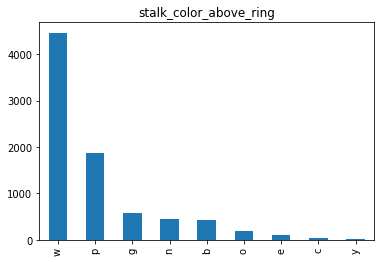

There are 9 unique values
Max repeated value with 4384 repetitions


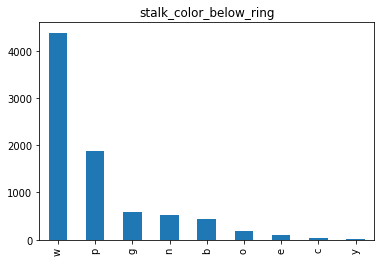

There are 1 unique values
Max repeated value with 8124 repetitions


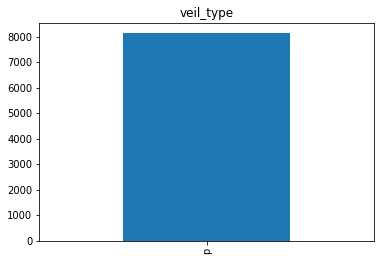

There are 4 unique values
Max repeated value with 7924 repetitions


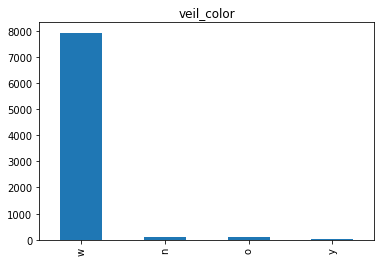

There are 3 unique values
Max repeated value with 7488 repetitions


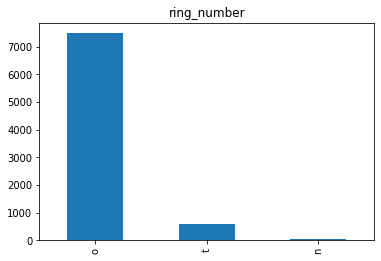

There are 5 unique values
Max repeated value with 3968 repetitions


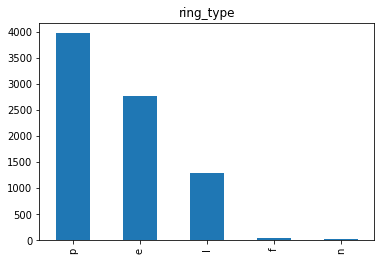

There are 9 unique values
Max repeated value with 2388 repetitions


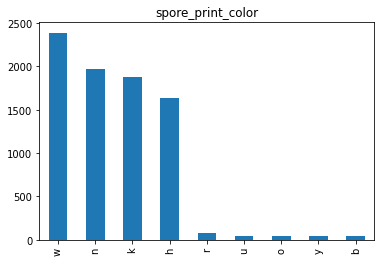

There are 6 unique values
Max repeated value with 4040 repetitions


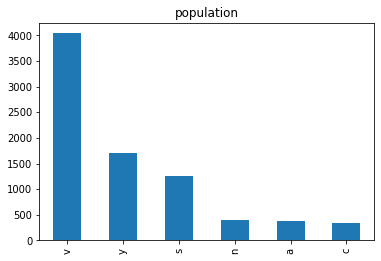

There are 7 unique values
Max repeated value with 3148 repetitions


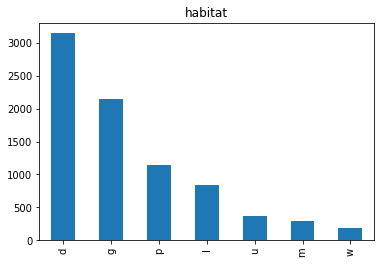

In [ ]:
for df in df_list.values():
  for col in df.columns:
        vc = df[col].value_counts()
        print('There are ' + str(len(vc)) + ' unique values')
        print('Max repeated value with ' + str(vc.max()) + ' repetitions')
        vc.plot(kind='bar')
        plt.title(col)
        plt.show()

We loop through a list of data frames df_list and for each data frame, it is converting any columns with object data type (textual) to integer labels using factorize function. factorize function assigns a unique integer label to each unique value in the column, and replaces each value in the column with its corresponding integer label.

Next, the code loops through each column of the data frame and creates a histogram.

We used it in order help us in understanding the data and labelling manually the nominal and not nominal fields, as shown in class.

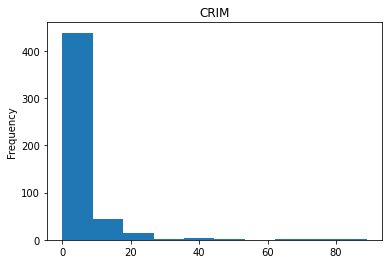

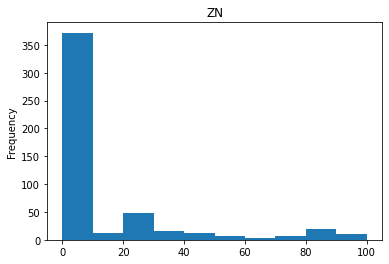

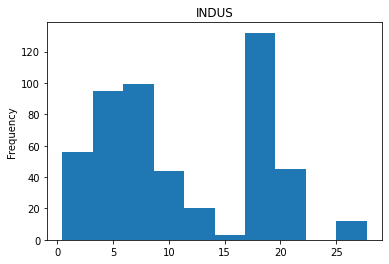

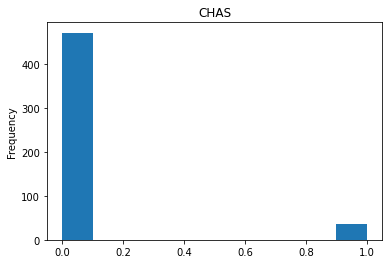

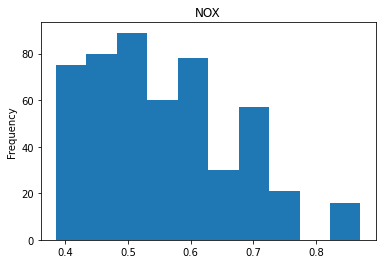

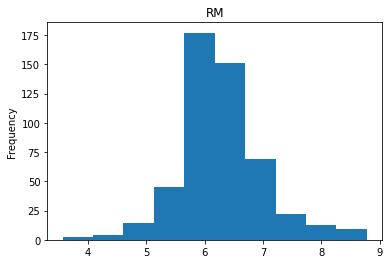

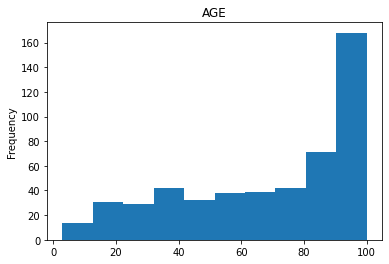

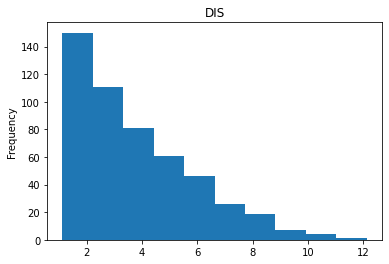

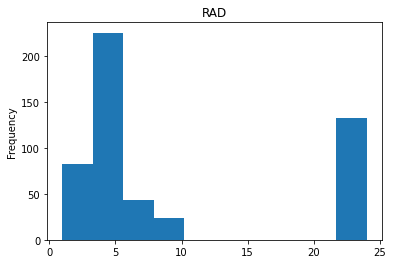

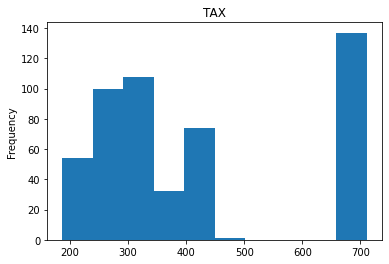

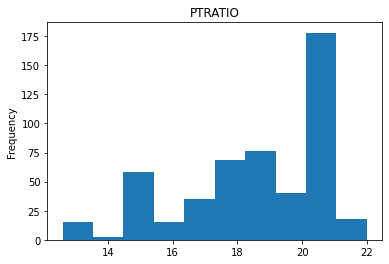

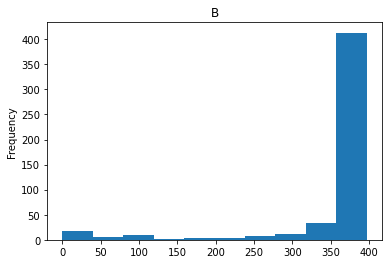

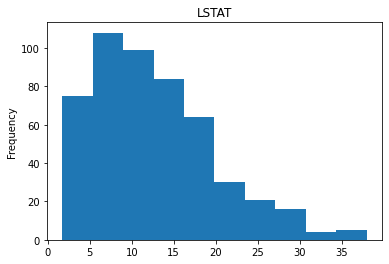

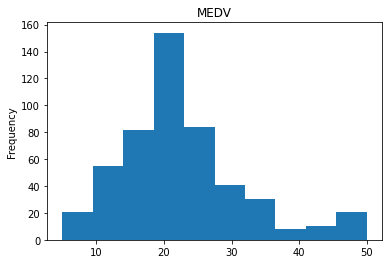

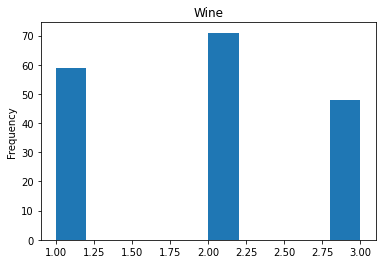

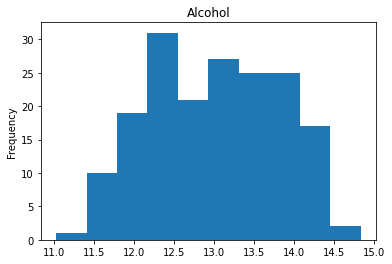

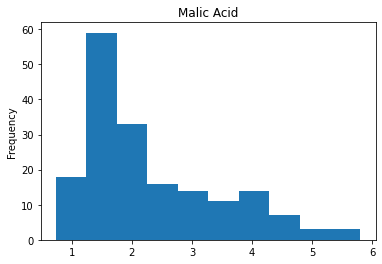

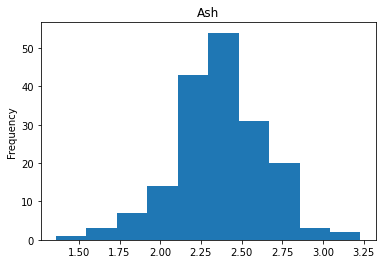

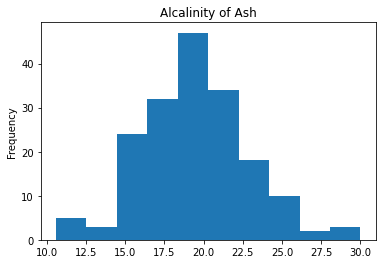

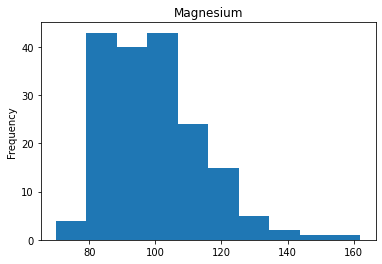

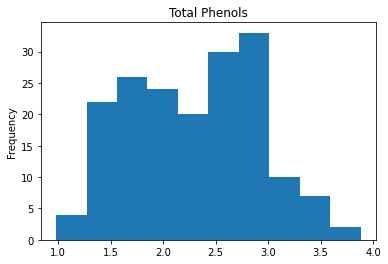

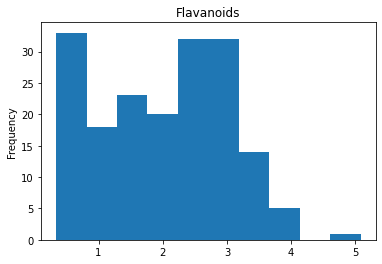

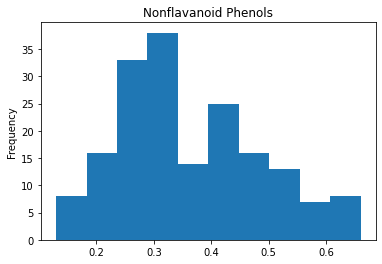

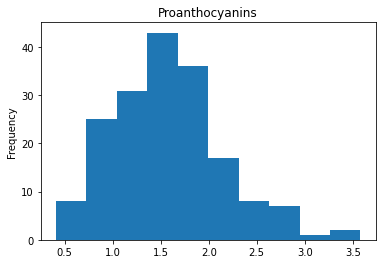

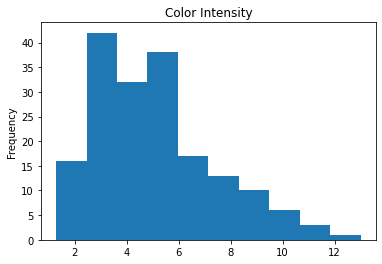

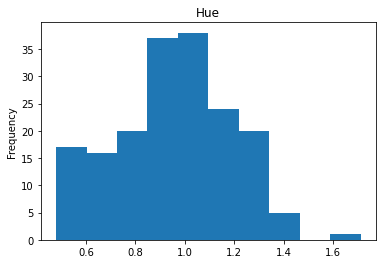

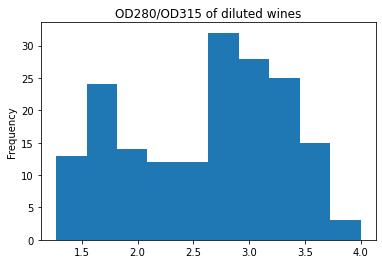

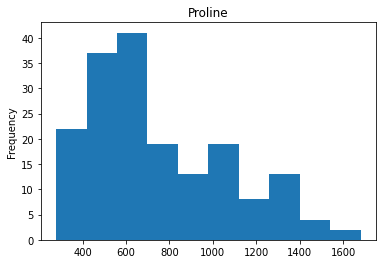

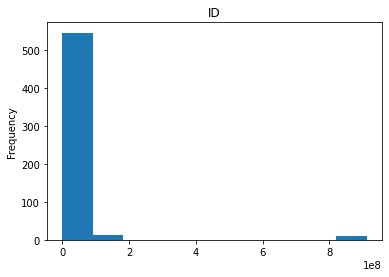

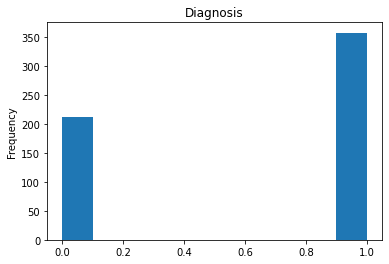

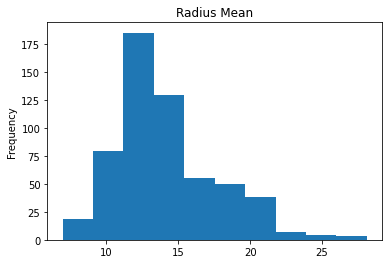

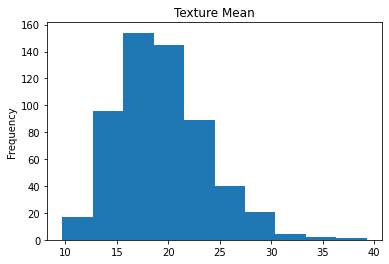

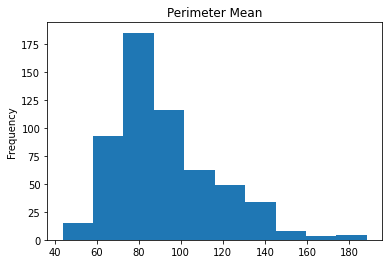

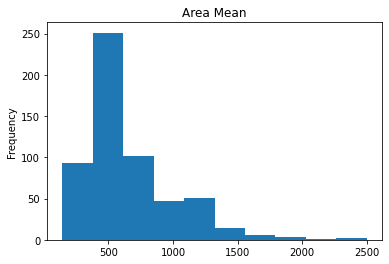

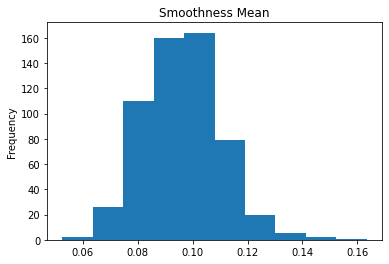

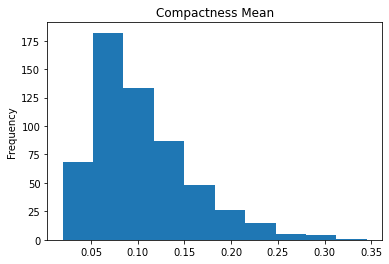

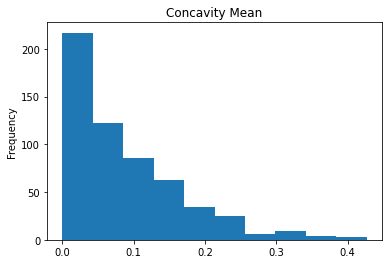

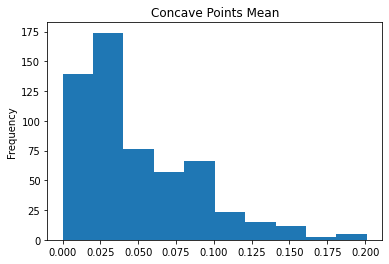

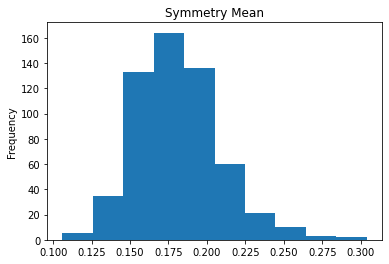

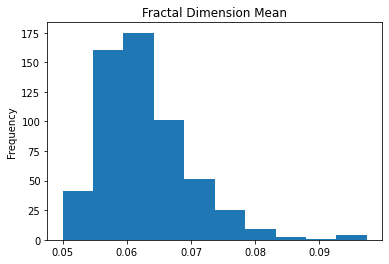

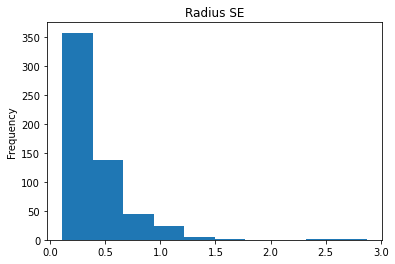

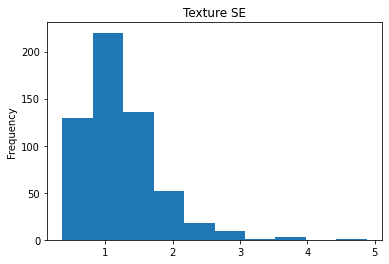

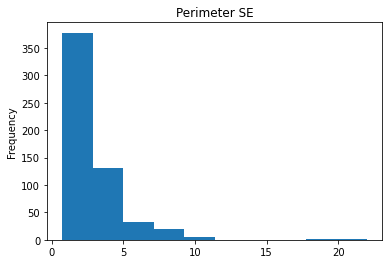

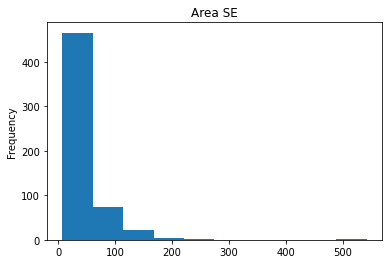

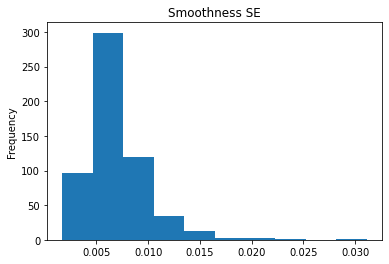

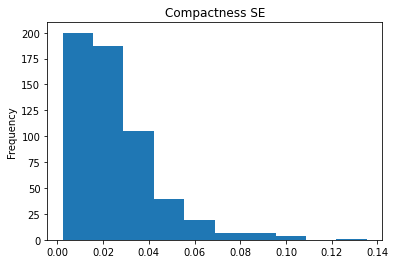

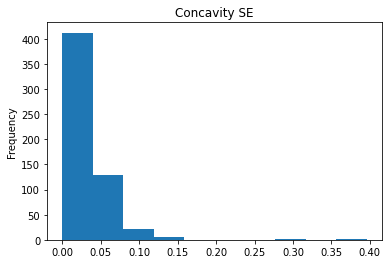

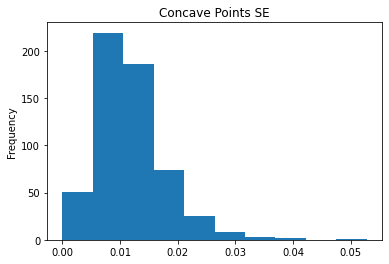

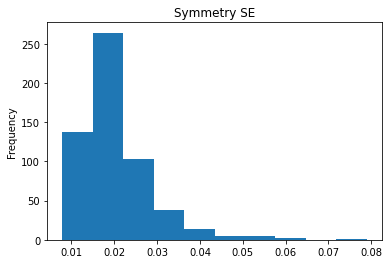

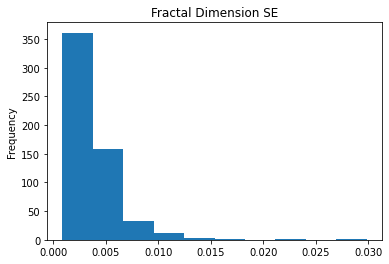

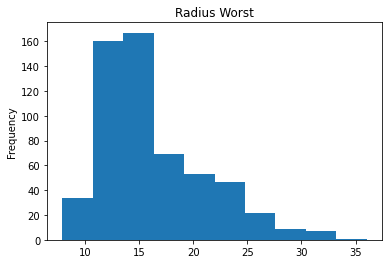

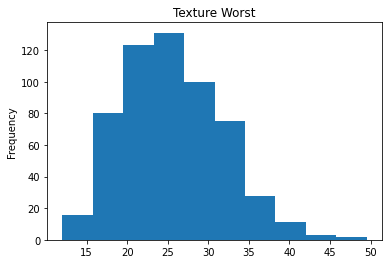

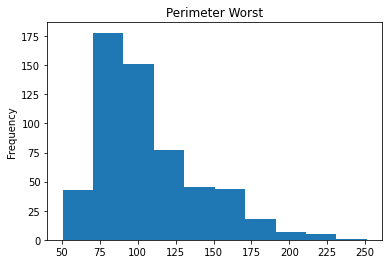

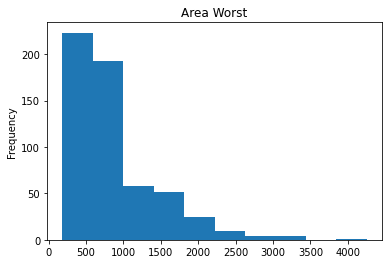

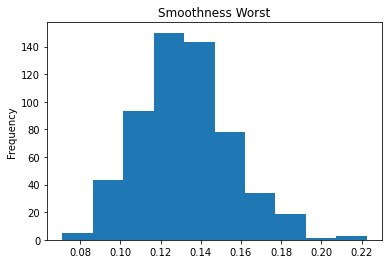

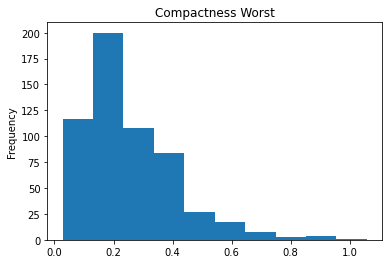

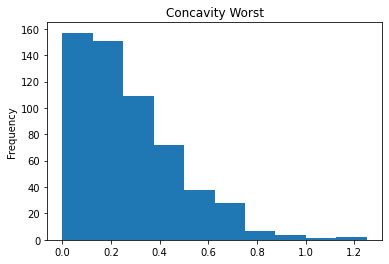

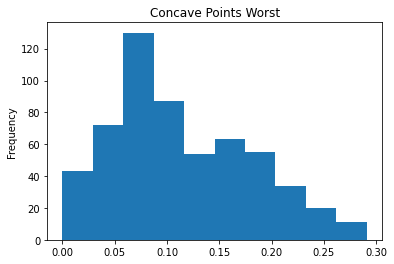

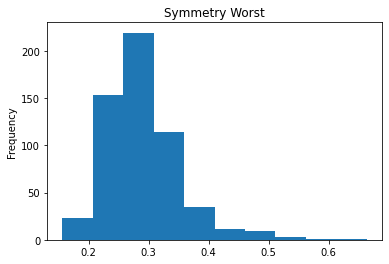

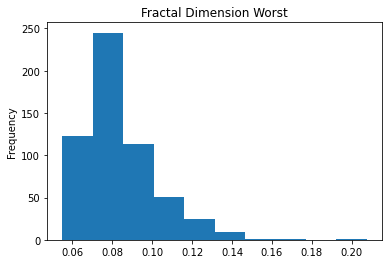

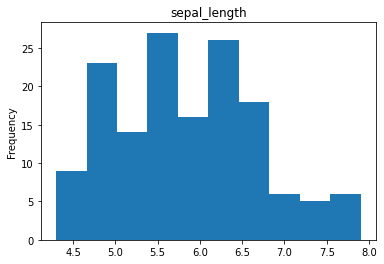

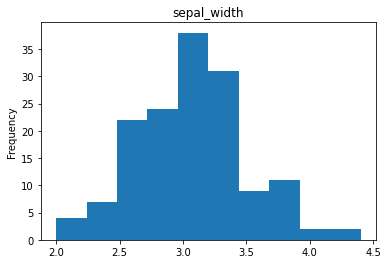

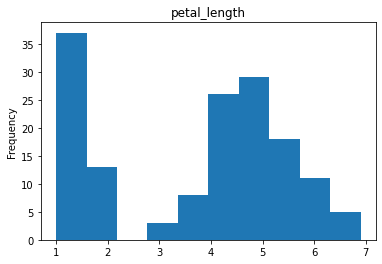

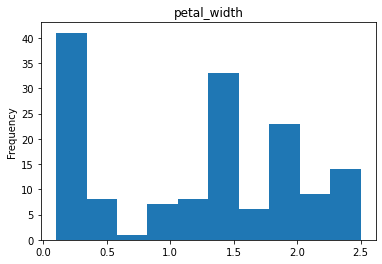

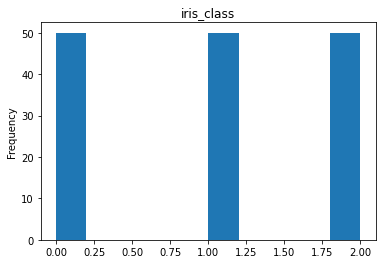

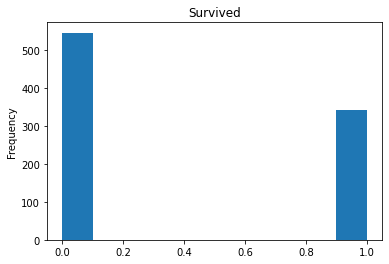

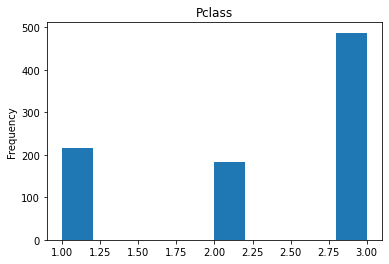

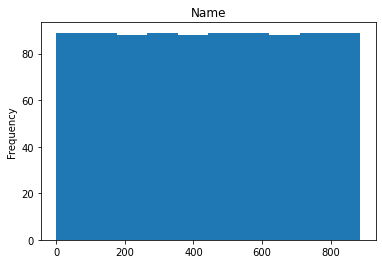

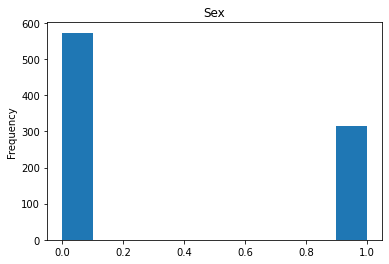

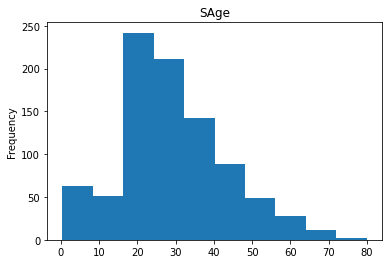

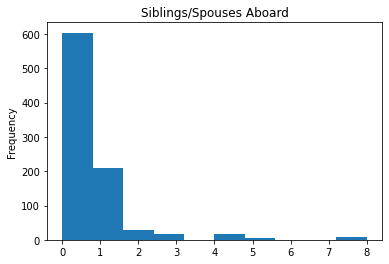

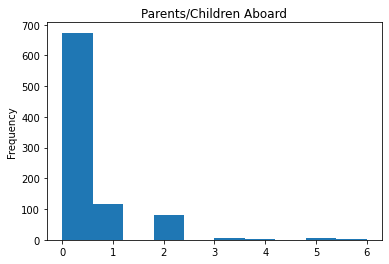

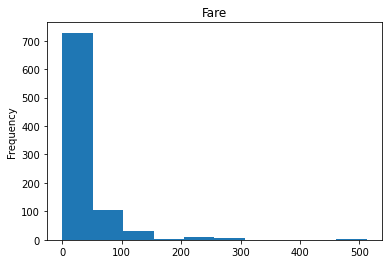

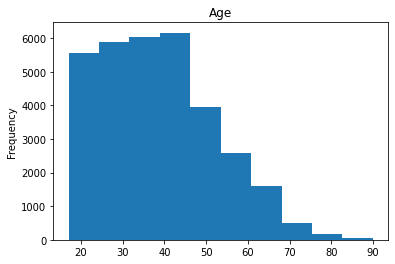

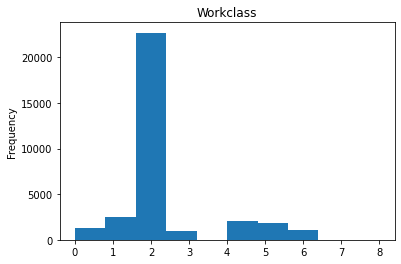

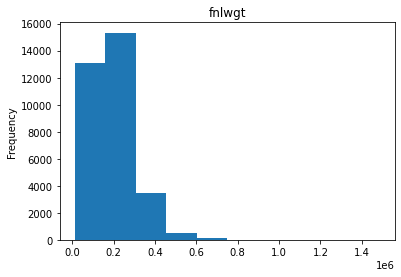

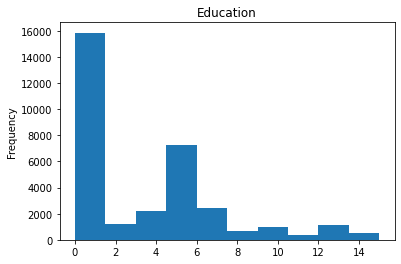

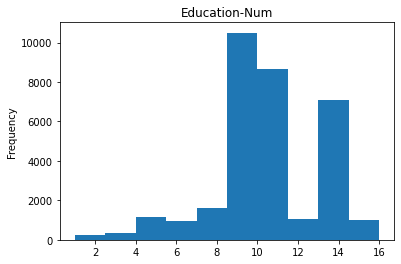

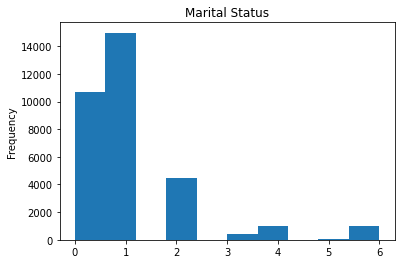

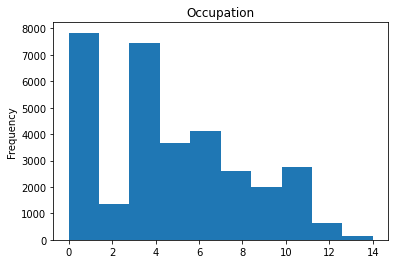

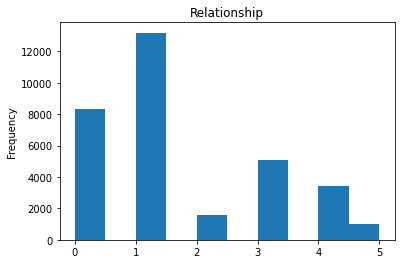

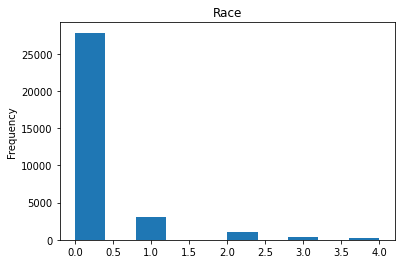

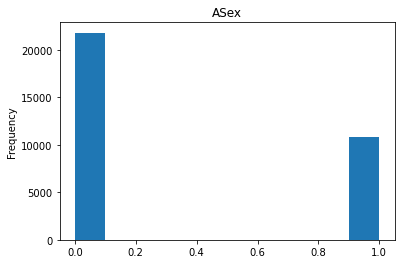

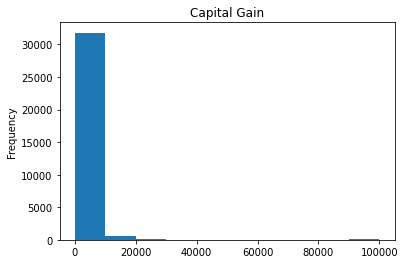

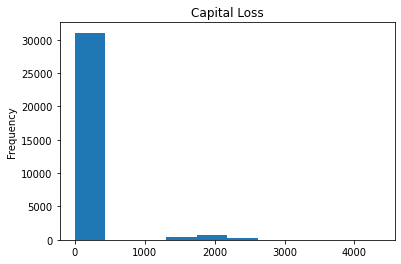

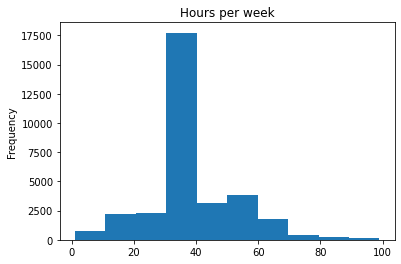

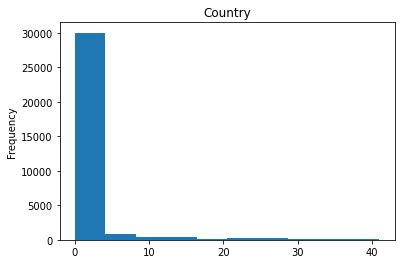

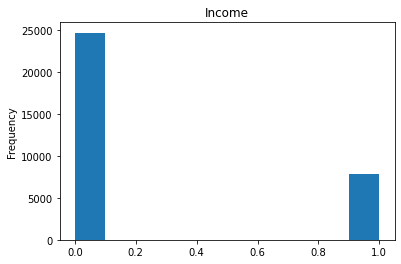

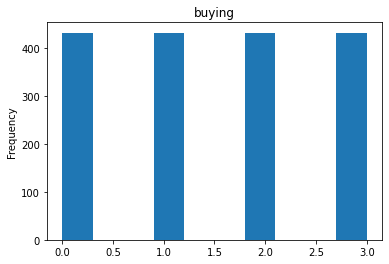

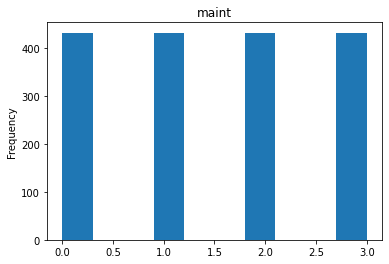

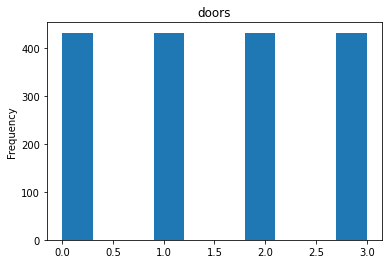

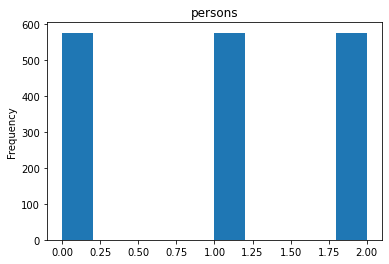

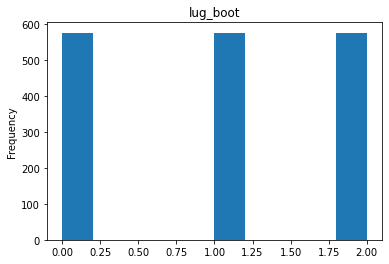

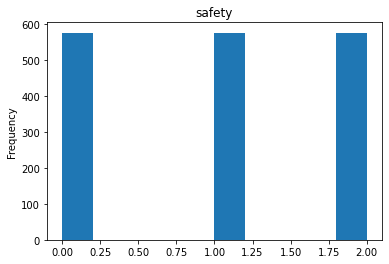

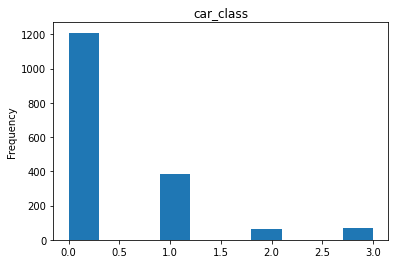

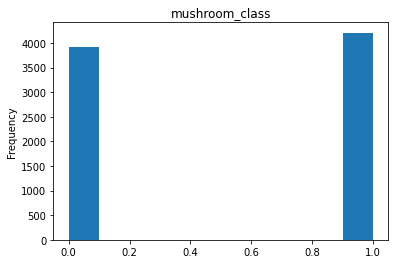

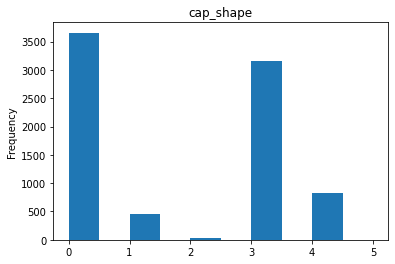

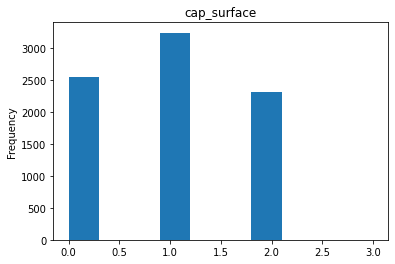

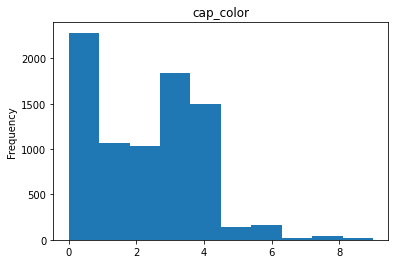

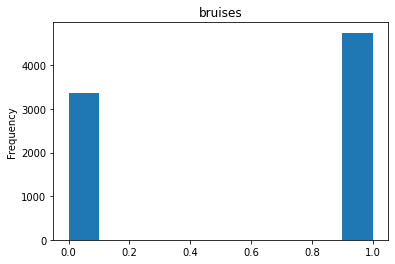

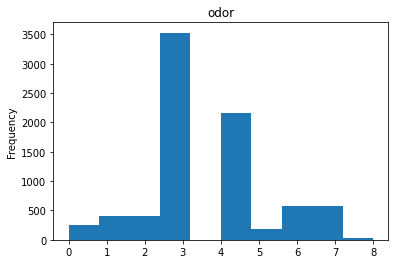

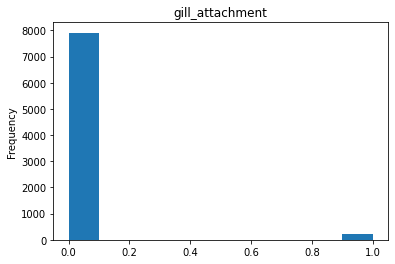

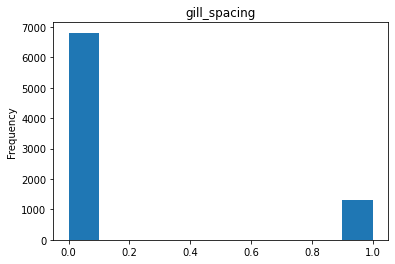

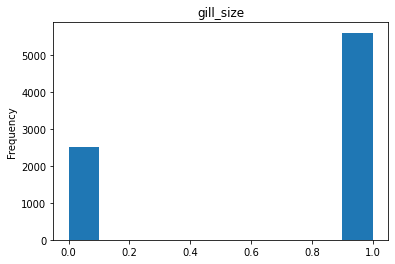

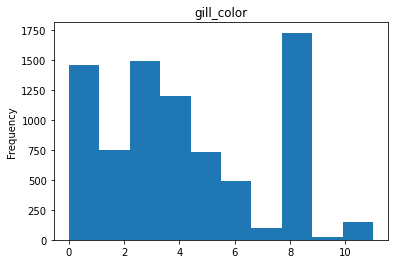

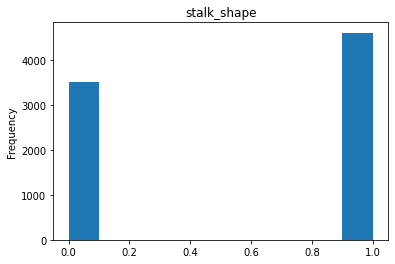

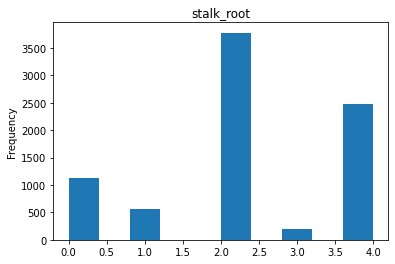

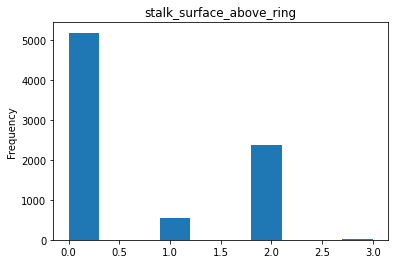

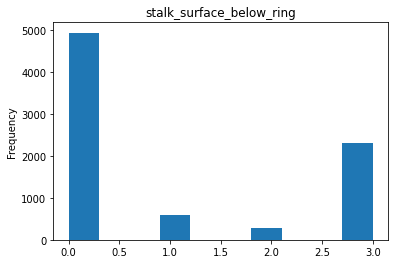

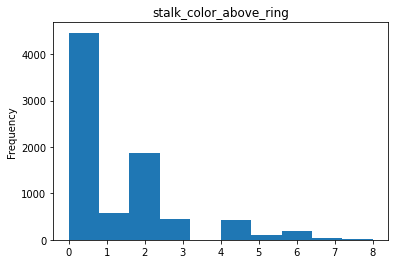

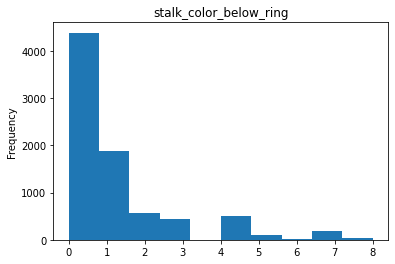

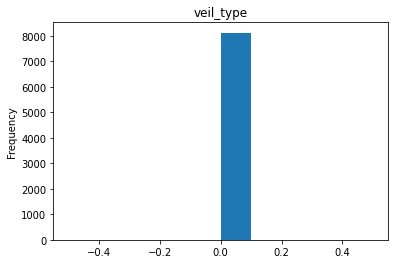

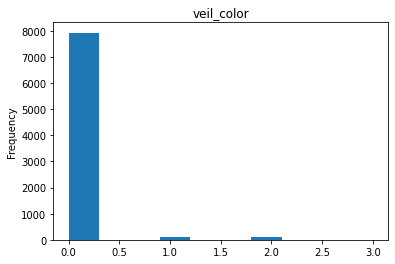

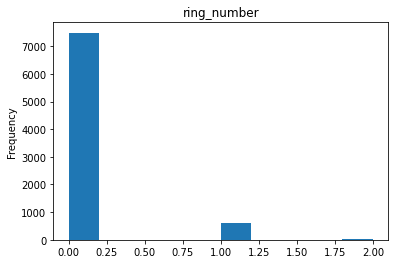

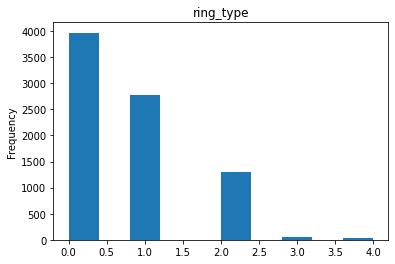

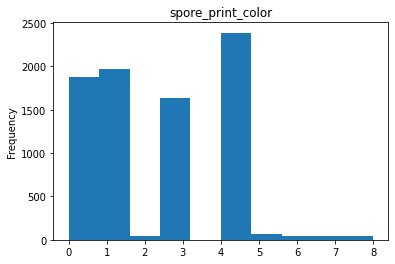

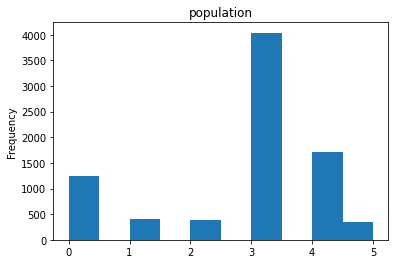

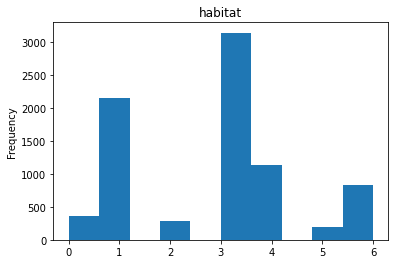

In [ ]:
for df in df_list.values():
  df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: pd.factorize(x)[0])
  for col in df.columns:
        vc = df[col]
        vc.plot(kind='hist')
        plt.title(col)
        plt.show()

We define two lists of column names - not_nominal and nominal - that specify which columns in a set of datasets are nominal and which are not.

The not_nominal list includes columns that are assumed to have numerical and not nominal values, such as 'CRIM' (crime rate), and 'Radius Mean'. These columns are not considered nominal because they do not have a finite set of discrete values and by their context we can also see it.

The nominal list includes columns that are assumed to have a finite set of discrete values, such as 'Sex' (gender), and 'cap_color' (cap color of mushrooms). These columns are considered nominal because they have a finite set of discrete values and by their context we can also see it.

We manually labeled each column to nominal and not nominal columns by using the plots above (value counts, histogram) and using every column context.

In [12]:
not_nominal = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
              'PTRATIO', 'B', 'LSTAT', 'MEDV', 'Alcohol', 'Malic Acid',
              'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols',
              'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins',
              'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines',
              'Proline', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
              'Area Mean', 'Smoothness Mean', 'Compactness Mean',
              'Concavity Mean', 'Concave Points Mean', 'Symmetry Mean',
              'Fractal Dimension Mean', 'Radius SE', 'Texture SE',
              'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE',
              'Concavity SE', 'Concave Points SE', 'Symmetry SE',
              'Fractal Dimension SE', 'Radius Worst', 'Texture Worst',
              'Perimeter Worst', 'Arwa Worst', 'Smoothness Worst',
              'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
              'Symmetry Worst', 'Fractal Dimension Worst', 'sepal_length',
              'sepal_width', 'petal_length', 'petal_width', 'SAge', 
              'Siblings/Spouses Aboard', 'Parents/Children Aboard',
              'Fair', 'Age', 'fnlwgt', 'Education', 'Education-Num',
              'Capital Gain', 'Capital Loss', 'Hours per week', 'Income',
              'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
              'gill_size', 'stalk_color_above_ring', 'stalk_color_below_ring',
              'stalk_surface_above_ring', 'stalk_surface_below_ring']


nominal = ['CHAS', 'RAD', 'Wine', 'ID', 'Diagnosis', 'iris_class', 'Survived',
          'Pclass', 'Name', 'Sex', 'Workclass', 'Marital Status',
          'Occupation', 'Relationship', 'Race', 'ASex', 'Country', 
          'car_class', 'mushroom_class', 'cap_shape', 'cap_surface',
          'cap_color', 'bruises', 'odor', 'gill_attachment',
          'gill_spacing', 'gill_color', 'stalk_shape', 'stalk_root',
          'veil_type', 'veil_color', 'ring_number', 'ring_type',
          'spore_print_color', 'population', 'habitat']

# Supervised learning approach

### First approach: feature extraction, Linear SVM Classifier and Random Forest Classifier

#### Create new dataset from datasets with coulmns fields as samples, statistical tests as features, and label nominal or not (1 or 0)

Here we take a list of datasets and creates a new dataset with each column of the original datasets as a sample, and statistical tests (ks-test, chi-square test, skewness, kurtosis, and unique count) as features. It also labels each sample as nominal (1) or not nominal (0), depending on whether the column is nominal or not. The resulting dataset is stored in a DataFrame named df_samples.

In [22]:
samples = []

# Loop through each dataset in the list
for df_key, df in df_list.items():
    print('current df is: ' + df_key)
    print(df)
    numeric_columns = df.dtypes[(df.dtypes=="float64") | (df.dtypes=="int64")].index.tolist()
    categorical_columns = [c for c in df.columns if c not in numeric_columns]

    # Convert categorical columns to numeric using factorize and perform statistical tests and label (1-nominal or 0-not)
    for cat_col in categorical_columns:
        print('current categorical column is: ' + cat_col)
        cat_col_numeric = pd.factorize(df[cat_col])[0]
        cat_col_numeric = cat_col_numeric[cat_col_numeric != -1]

        # Calculate ks-test
        m, s = norm.fit(cat_col_numeric)
        if s == 0:
          s = 0.000000000000001
        p_value_ks_norm = ks(cat_col_numeric, norm.cdf, args=(m,s))[1]
        p_value_ks_uniform = ks(cat_col_numeric, uniform.cdf)[1]

        # Calculate chi square test
        observed_freq = np.bincount(cat_col_numeric)
        p_value_chi2 = chisquare(observed_freq)[1]

        # Calculate skewness and kurtosis
        skewness = skew(cat_col_numeric)
        kurt = kurtosis(cat_col_numeric)
        unique_count = df[cat_col].nunique(dropna=True)
        if cat_col in not_nominal:
            samples.append([p_value_ks_norm, p_value_ks_uniform, p_value_chi2, skewness, kurt, unique_count, 0])
        else:
            samples.append([p_value_ks_norm, p_value_ks_uniform, p_value_chi2, skewness, kurt, unique_count, 1])

    # Add numeric columns to the samples list with their statistical tests and label (1-nominal or 0-not)
    for num_col in numeric_columns:
        
        # Calculate ks-test
        m, s = norm.fit(df[num_col])

        # For not dividing with 0
        if s == 0:
          s = 0.000000000000001
        p_value_ks_norm = ks(df[num_col].values, norm.cdf, args=(m,s))[1]
        p_value_ks_uniform = ks(df[num_col].values, uniform.cdf)[1]
        
        # Calculate chi square test
        observed_freq = np.histogram(df[num_col], bins='auto')[0]
        p_value_chi2 = chisquare(observed_freq)[1]
        
        # Calculate skewness and kurtosis
        skewness = skew(df[num_col])
        kurt = kurtosis(df[num_col])
        unique_count = df[num_col].nunique(dropna=True)
        if num_col in not_nominal:
            samples.append([p_value_ks_norm, p_value_ks_uniform, p_value_chi2, skewness, kurt, unique_count, 0])
        else:
            samples.append([p_value_ks_norm, p_value_ks_uniform, p_value_chi2, skewness, kurt, unique_count, 1])

df_samples = pd.DataFrame(samples, columns=['p_value_ks_norm', 'p_value_ks_uniform', 'p_value_chi_square', 'skewness', 'kurtosis', 'unique_count', 'should_be_treated_nominal'])


current df is: housing
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1   

Here we create a new DataFrame X by dropping the column 'should_be_treated_nominal' from an existing DataFrame df_samples. Then we loop through all columns in X, fill any missing values in each column with the column mean using fillna(), and assign the modified column back to X. Then, we assign the column 'should_be_treated_nominal' from df_samples to y. Finally, we split the data into train and test sets

In [23]:
X = df_samples.drop(['should_be_treated_nominal'], axis=1)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())
y = df_samples['should_be_treated_nominal']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### SVM Linear classification
Here we use an SVM classifier model in order to classify between nominal and not nominal columns.

In [24]:
# Create and train SVM classifier
clf = SVC(kernel='rbf', gamma='scale', C=1.0)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


#### Random Forest Classifier- our best model
Here we use a Random Forest classifier model with grid search (to find the best hyper parameters) in order to classify between nominal and not nominal columns.

In [25]:
# Define hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest Classifier
clf = RandomForestClassifier()

# Use grid search to find best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Train accuracy: ", grid_search.best_score_)

# Evaluate model on test set
clf = RandomForestClassifier(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train accuracy:  0.8403508771929825
Test accuracy: 0.9166666666666666


### Second approach: Deep learning Classifier
Here we perform a K-fold cross-validation using a deep learning classifier model to classify between nominal and non-nominal columns.

In [ ]:
# Set random seeds
np.random.seed(10)
tf.random.set_seed(10)

# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(concat_df.T.values)

# Set up the labels for each column
labels = np.array([1 if col in nominal else 0 for col in concat_df.columns])

# Define the number of folds
k = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=k, shuffle=True, random_state=10)

# Define lists to store results for each fold
accuracy_scores = []
loss_scores = []

# Start the K-fold Cross Validation
fold_no = 1
for train, test in kfold.split(data, labels):

    # Build the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(data.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x=data[train], y=labels[train], epochs=20, validation_split=0.2)

    # Evaluate the model
    scores = model.evaluate(data[test], labels[test], verbose=0)

    # Save the scores for this fold
    loss_scores.append(scores[0])
    accuracy_scores.append(scores[1])

    # Print the results for this fold
    print(f'Fold {fold_no}: Loss: {scores[0]} Accuracy: {scores[1]}')

    # Increment the fold number
    fold_no += 1

# Print the mean and standard deviation of the results for all folds
print(f'Loss: {np.mean(loss_scores):.2f} (+/- {np.std(loss_scores):.2f})')
print(f'Accuracy: {np.mean(accuracy_scores):.2f} (+/- {np.std(accuracy_scores):.2f})')


Epoch 1/20
2/2 [==============================] - 2s 236ms/step - loss: 0.9032 - accuracy: 0.5789 - val_loss: 0.7028 - val_accuracy: 0.2000
Epoch 2/20
2/2 [==============================] - 0s 36ms/step - loss: 0.8890 - accuracy: 0.4561 - val_loss: 0.7036 - val_accuracy: 0.2000
Epoch 3/20
2/2 [==============================] - 0s 36ms/step - loss: 0.8646 - accuracy: 0.5614 - val_loss: 0.7063 - val_accuracy: 0.2000
Epoch 4/20
2/2 [==============================] - 0s 34ms/step - loss: 0.8152 - accuracy: 0.5965 - val_loss: 0.7071 - val_accuracy: 0.2000
Epoch 5/20
2/2 [==============================] - 0s 32ms/step - loss: 0.8467 - accuracy: 0.6316 - val_loss: 0.7075 - val_accuracy: 0.2000
Epoch 6/20
2/2 [==============================] - 0s 33ms/step - loss: 0.9165 - accuracy: 0.5263 - val_loss: 0.7089 - val_accuracy: 0.2000
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 0.8374 - accuracy: 0.5614 - val_loss: 0.7092 - val_accuracy: 0.2000
Epoch 8/20
2/2 [==========

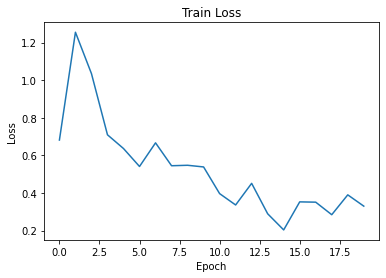

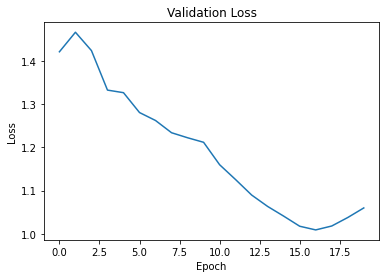

In [ ]:
# Plot the training losses
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the validation losses
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Unsupervised learning approach

Here we use PCA with 10 components and KMeans with 4 clusters and the 'k-means++' initialization method. We then map the cluster labels to the nominal and non-nominal labels based on which cluster has a higher proportion of nominal columns, and calculate the accuracy of the clustering.

In [ ]:
# Set up the labels for each column
labels = np.array([1 if col in nominal else 0 for col in concat_df.columns])

# Perform PCA
pca = PCA(n_components=10, random_state=0)
pca_result = pca.fit_transform(concat_df.T.values)

# Perform clustering on PCA result
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10).fit(pca_result)

# Map the clustering result to column types
cluster_labels = kmeans.labels_
pred_labels = np.zeros(len(labels))
for cluster_label in np.unique(cluster_labels):
    mask = cluster_labels == cluster_label
    if np.mean(labels[mask]) > 0.5:
        pred_labels[mask] = 1

# Calculate accuracy of clustering
accuracy = sum(pred_labels == labels) / len(labels)
print(f"Clustering accuracy: {accuracy}")


Clustering accuracy: 0.6813186813186813
